# EDA 

In [2]:
import pandas as pd

In [3]:
# Загрузка данных
data = pd.read_excel("/Users/mymac/Desktop/disserta/sales.xlsx")

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30528 entries, 0 to 30527
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   product name            30528 non-null  object        
 1   unique_id               30528 non-null  int64         
 2   Сегмент рынка           30528 non-null  object        
 3   Категория товара        30528 non-null  object        
 4   date                    30528 non-null  datetime64[ns]
 5   weight                  30528 non-null  int64         
 6   price                   30528 non-null  int64         
 7   cost price              30528 non-null  float64       
 8   promo action            30528 non-null  object        
 9   exp                     30528 non-null  int64         
 10  sex                     30528 non-null  object        
 11  class                   30528 non-null  object        
 12  y                       30528 non-null  int64 

In [3]:
data.head()

,product name,unique_id,Сегмент рынка,Категория товара,date,weight,price,cost price,promo action,exp,...,рейтинг товаров,количество просмотров,конкуренция,month,day_of_week,sales_3m_avg,sales_6m_avg,sales_12m_avg,discount,seasonal_discount
0,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-06-15,2000,363,78.0,нет,36,...,2.5,5000,низкая,6,1,7.0,7.0,7.0,7,0
1,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-06-22,2000,363,78.0,нет,36,...,2.5,5000,низкая,6,1,5.5,5.5,5.5,7,0
2,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-06-29,2000,363,78.0,нет,36,...,2.5,5000,низкая,6,1,8.7,8.7,8.7,7,0
3,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-07-06,2000,363,78.0,нет,36,...,2.5,5000,низкая,7,1,7.0,7.0,7.0,7,0
4,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-07-13,2000,363,78.0,нет,36,...,2.5,5000,низкая,7,1,7.7,6.8,6.8,7,0


* product name: Название продукта.
* unique_id: Уникальный идентификатор продукта.
* Сегмент рынка, Категория товара, date, weight, price, cost price: Различные атрибуты продукта, такие как сегмент рынка, категория, дата продажи, вес, цена и себестоимость.
* promo action, exp, рейтинг товаров, количество просмотров, конкуренция: Дополнительные параметры, включая информацию о промоакциях, сроке годности, рейтинге, количестве * * просмотров и уровне конкуренции.
* month, day_of_week, sales_3m_avg, sales_6m_avg, sales_12m_avg, discount, seasonal_discount: Дополнительные атрибуты для анализа продаж, включая месяц, день недели, средние продажи за различные периоды, скидки и сезонные скидки.

In [4]:
# Проверка на пропущенные значения и получение общей информации о типах данных
missing_values = data.isnull().sum()
data_types = data.dtypes
summary_statistics = data.describe()

missing_values, data_types, summary_statistics


(product name              0
 unique_id                 0
 Сегмент рынка             0
 Категория товара          0
 date                      0
 weight                    0
 price                     0
 cost price                0
 promo action              0
 exp                       0
 sex                       0
 class                     0
 y                         0
 функция                   0
 количество компонентов    0
 сложность изготовления    0
 рейтинг товаров           0
 количество просмотров     0
 конкуренция               0
 month                     0
 day_of_week               0
 sales_3m_avg              0
 sales_6m_avg              0
 sales_12m_avg             0
 discount                  0
 seasonal_discount         0
 dtype: int64,
 product name                      object
 unique_id                          int64
 Сегмент рынка                     object
 Категория товара                  object
 date                      datetime64[ns]
 weight              

## Обзор данных
### Пропущенные значения:
* В данных нет пропущенных значений во всех колонках, что упрощает дальнейший анализ.

### Типы данных:

* Временная метка (date) корректно распознана как datetime64.
* Большинство других атрибутов представлены числовыми значениями (int64 и float64), что подходит для статистического анализа и машинного обучения.
* Некоторые атрибуты, такие как product name, Сегмент рынка, и Категория товара представлены в текстовом формате (object), что может потребовать преобразования для некоторых видов анализа.

### Основные статистики:

* Наблюдается различное распределение значений по атрибутам, такие как price, cost price, y (целевая переменная?), рейтинг товаров, и количество просмотров.
* Стандартное отклонение и среднее значение показывают значительный разброс в данных, что важно учитывать при моделировании и прогнозировании.

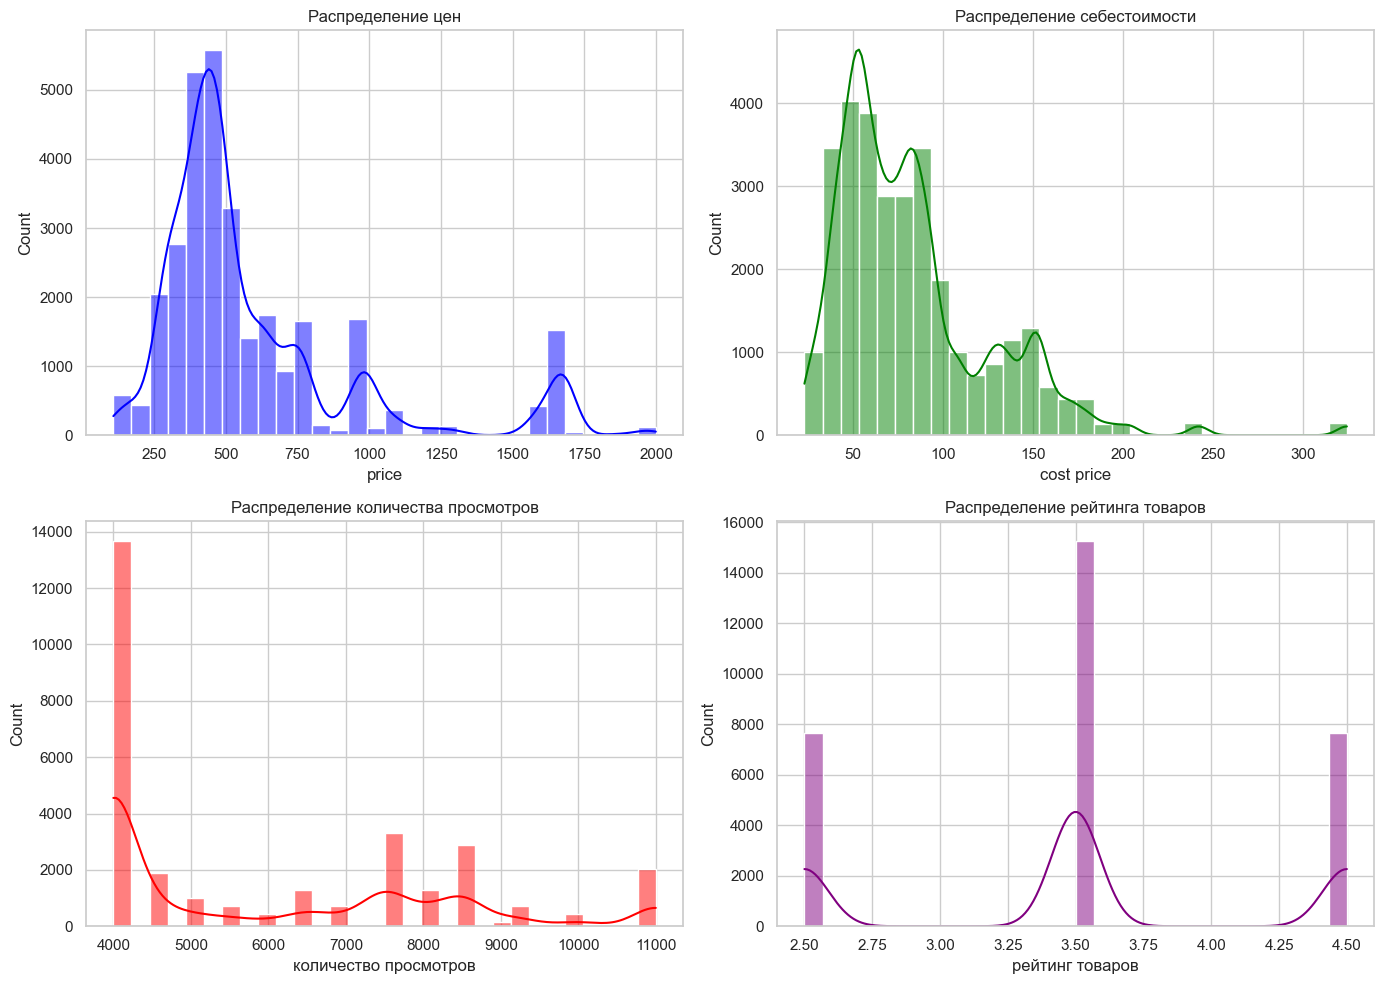

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для отображения графиков
sns.set(style="whitegrid")

# Отрисовка графиков распределения для некоторых ключевых числовых атрибутов
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Распределение цен
sns.histplot(data['price'], bins=30, ax=axes[0, 0], color='blue', kde=True)
axes[0, 0].set_title('Распределение цен')

# Распределение себестоимости
sns.histplot(data['cost price'], bins=30, ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Распределение себестоимости')

# Распределение количества просмотров
sns.histplot(data['количество просмотров'], bins=30, ax=axes[1, 0], color='red', kde=True)
axes[1, 0].set_title('Распределение количества просмотров')

# Распределение рейтинга товаров
sns.histplot(data['рейтинг товаров'], bins=30, ax=axes[1, 1], color='purple', kde=True)
axes[1, 1].set_title('Распределение рейтинга товаров')

plt.tight_layout()
plt.show()


## Выводы по графикам распределения

### Распределение цен:

* Цены имеют положительное смещение (right-skewed distribution), что указывает на наличие продуктов с высокой ценой, но большинство продуктов имеют сравнительно низкую цену. Это может потребовать нормализации данных перед использованием в моделях машинного обучения.

### Распределение себестоимости:

* Похоже на распределение цен, также с положительным смещением. Много продуктов с низкой себестоимостью, но есть и такие, чья себестоимость значительно выше среднего.

### Распределение количества просмотров:

* Распределение количества просмотров продуктов демонстрирует два пика, что может указывать на два различных типа продуктов: те, что часто просматривают, и те, что просматривают реже. Это может быть связано с популярностью или доступностью товара.

### Распределение рейтинга товаров:

* Распределение более равномерное, но все же заметно, что многие товары имеют средний рейтинг, сосредоточенный около медианы. Это может указывать на то, что потребители склонны ставить товару оценки ближе к среднему значению.

In [4]:
# Агрегирование данных по unique_id для ключевых переменных
grouped_data = data.groupby('unique_id').agg({
    'price': ['mean', 'std', 'min', 'max'],
    'cost price': ['mean', 'std', 'min', 'max'],
    'рейтинг товаров': ['mean', 'std', 'min', 'max'],
    'количество просмотров': ['mean', 'std', 'min', 'max'],
    'sales_3m_avg': ['mean', 'std', 'min', 'max'],
    'sales_6m_avg': ['mean', 'std', 'min', 'max'],
    'sales_12m_avg': ['mean', 'std', 'min', 'max']
}).reset_index()

# Переименование колонок для лучшей читаемости
grouped_data.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped_data.columns.values]

grouped_data.head()
#grouped_data.to_excel('/Users/mymac/Desktop/disserta/grouped_data.xlsx', index=False)


,unique_id,price_mean,price_std,price_min,price_max,cost price_mean,cost price_std,cost price_min,cost price_max,рейтинг товаров_mean,...,sales_3m_avg_min,sales_3m_avg_max,sales_6m_avg_mean,sales_6m_avg_std,sales_6m_avg_min,sales_6m_avg_max,sales_12m_avg_mean,sales_12m_avg_std,sales_12m_avg_min,sales_12m_avg_max
0,9,362.416667,12.312652,343,390,78.000000,0.0,78.000000,78.000000,2.5,...,0.0,14.0,7.358333,2.144745,1.8,11.5,7.326389,1.574890,3.5,10.3
1,10,387.784722,11.929374,364,418,83.600000,0.0,83.600000,83.600000,3.5,...,0.7,14.3,6.697222,3.777092,1.7,13.2,6.559722,3.486183,2.1,13.0
2,11,388.465278,10.379453,368,418,83.600000,0.0,83.600000,83.600000,3.5,...,3.0,34.0,16.598611,4.468053,4.0,30.5,16.501389,3.135383,8.8,24.1
3,12,703.138889,14.667700,672,710,151.106404,0.0,151.106404,151.106404,4.5,...,170.0,1337.7,722.888889,186.141790,274.0,1160.0,718.923611,143.371354,394.4,1059.7
4,13,546.256944,11.638943,517,552,117.400000,0.0,117.400000,117.400000,3.5,...,41.7,912.0,485.147917,118.749712,189.3,780.0,484.038889,88.835266,284.9,711.1


## ТРЕНД СЕЗОННОСТЬ ОСТАТКИ АВТОКОРРЕЛЯЦИОННАЯ ФУНКЦИЯ ЧАСТИЧНАЯ АВТОКОРРЕЛЯЦИЯ

In [7]:
import os
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_excel('/Users/mymac/Desktop/disserta/predictions/datasets/sales (2).xlsx')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Функция для анализа временного ряда
def analyze_time_series(unique_id):
    ts_data = data[data['unique_id'] == unique_id]['y']
    result = seasonal_decompose(ts_data, model='additive', period=52)
    
    # Путь для сохранения графиков
    plot_dir = '/Users/mymac/Desktop/disserta/predictions/datasets/plots'
    if not os.path.exists(plot_dir):
        os.makedirs(plot_dir)

    # Сохранение графиков
    fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    result.observed.plot(ax=axes[0], title='Observed')
    result.trend.plot(ax=axes[1], title='Trend')
    result.seasonal.plot(ax=axes[2], title='Seasonality')
    result.resid.plot(ax=axes[3], title='Residuals')
    plt.tight_layout()
    plt.savefig(f'{plot_dir}/{unique_id}_decomposition.png')
    plt.close(fig)
    
    # Сохранение ACF и PACF
    fig_acf, ax_acf = plt.subplots(figsize=(10, 3))
    plot_acf(ts_data, ax=ax_acf, lags=40)
    plt.title('Autocorrelation Function')
    plt.savefig(f'{plot_dir}/{unique_id}_acf.png')
    plt.close(fig_acf)

    fig_pacf, ax_pacf = plt.subplots(figsize=(10, 3))
    plot_pacf(ts_data, ax=ax_pacf, lags=40, method='ywm')
    plt.title('Partial Autocorrelation Function')
    plt.savefig(f'{plot_dir}/{unique_id}_pacf.png')
    plt.close(fig_pacf)

# Применение функции ко всем уникальным ID
unique_ids = data['unique_id'].unique()
for uid in unique_ids:
    analyze_time_series(uid)


## Для каждого продукта рассчитала среднее значение, стандартное отклонение, минимальное и максимальное значения следующих переменных:

* Цена (price): показывает вариативность цены продукта.
* Себестоимость (cost price): информирует о вариативности затрат на производство.
* Рейтинг товаров (рейтинг товаров): отражает колебания в оценках продукта.
* Количество просмотров (количество просмотров): показывает популярность или видимость продукта.
* Средние продажи за 3, 6 и 12 месяцев (sales_3m_avg, sales_6m_avg, sales_12m_avg): информирует о тенденциях продаж.

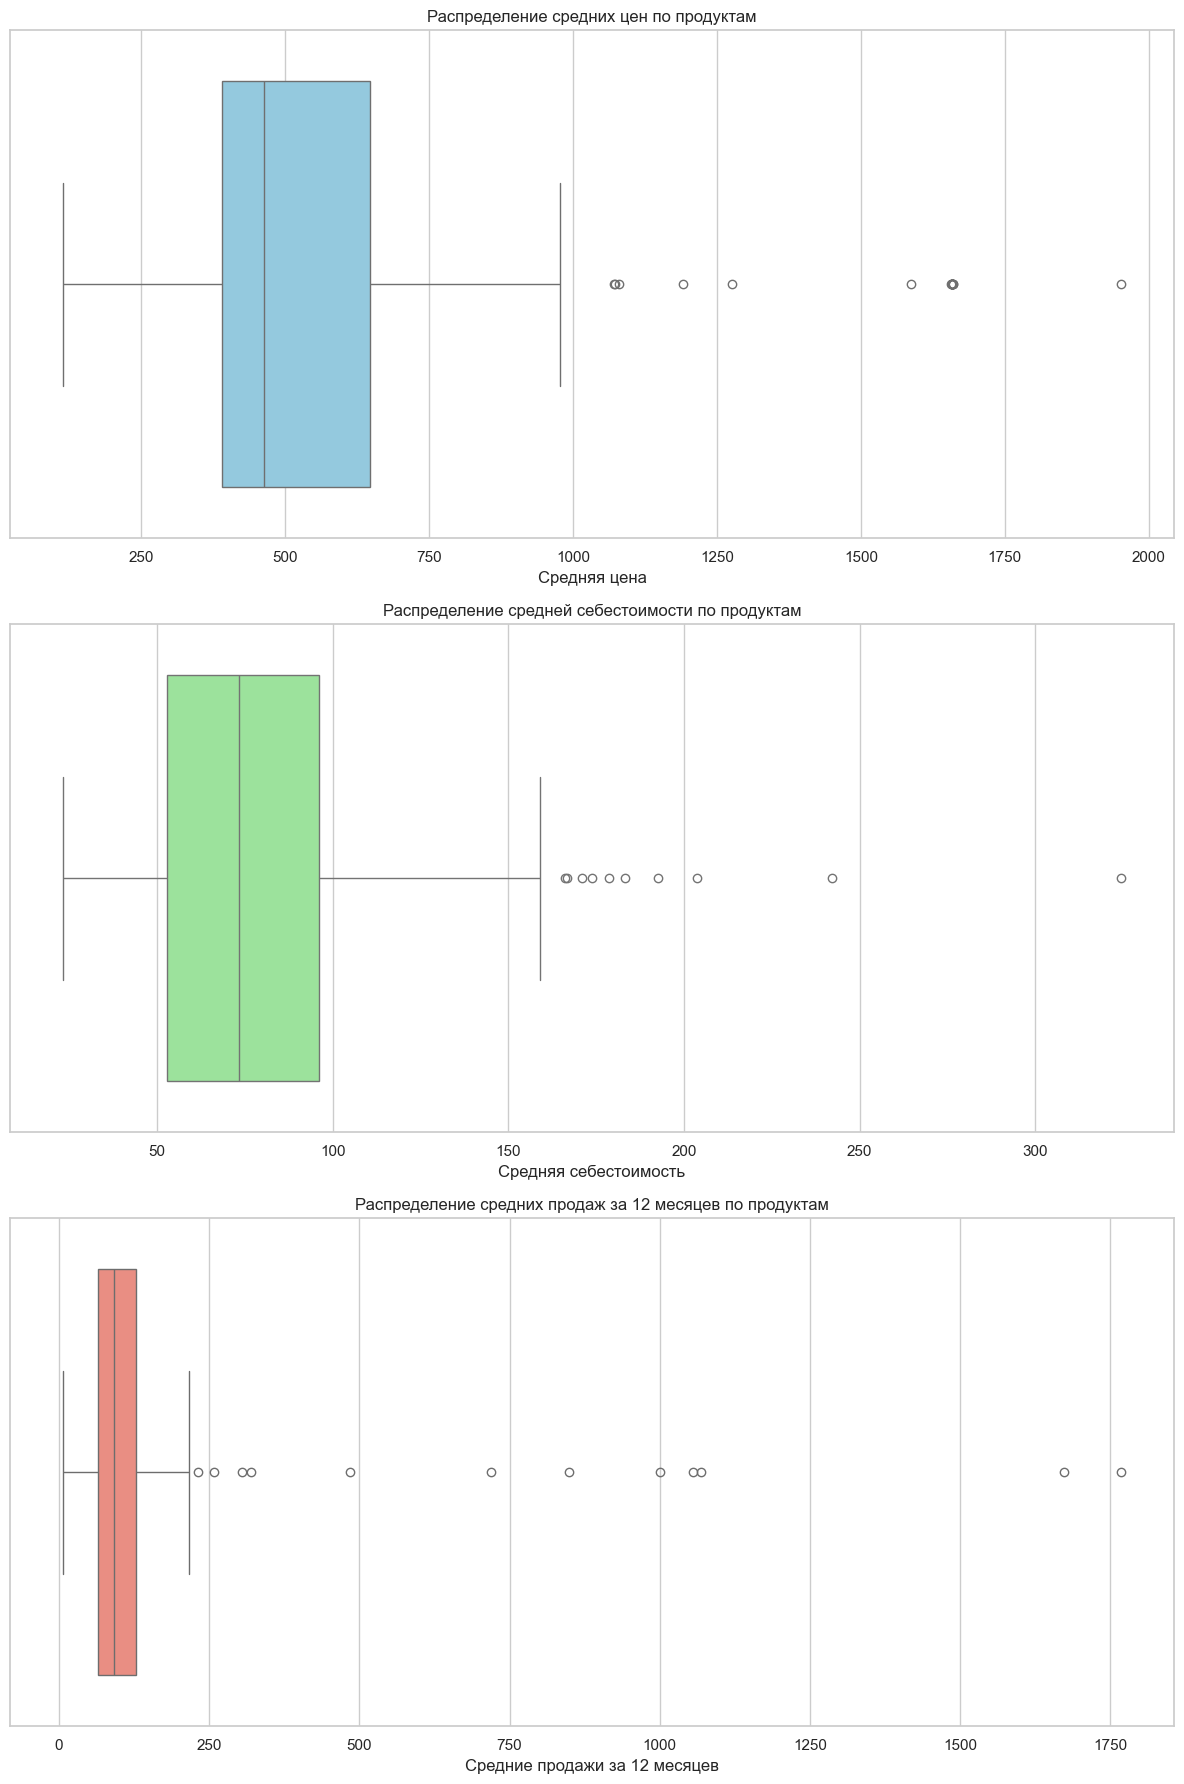

In [9]:
# Визуализация агрегированных данных для цены, себестоимости и продаж с помощью boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Boxplot для цен
sns.boxplot(x='price_mean', data=grouped_data, ax=axes[0], color='skyblue')
axes[0].set_title('Распределение средних цен по продуктам')
axes[0].set_xlabel('Средняя цена')

# Boxplot для себестоимости
sns.boxplot(x='cost price_mean', data=grouped_data, ax=axes[1], color='lightgreen')
axes[1].set_title('Распределение средней себестоимости по продуктам')
axes[1].set_xlabel('Средняя себестоимость')

# Boxplot для средних продаж за 12 месяцев
sns.boxplot(x='sales_12m_avg_mean', data=grouped_data, ax=axes[2], color='salmon')
axes[2].set_title('Распределение средних продаж за 12 месяцев по продуктам')
axes[2].set_xlabel('Средние продажи за 12 месяцев')

plt.tight_layout()
plt.show()


## Выводы по визуализациям агрегированных данных

### Распределение средних цен по продуктам:

* Большинство продуктов имеют среднюю цену в узком диапазоне, но есть некоторые продукты с очень высокой средней ценой, что видно по выбросам.

### Распределение средней себестоимости по продуктам:

* Распределение себестоимости похоже на распределение цен, что может указывать на прямую связь между себестоимостью и ценой продукта. Также присутствуют выбросы с высокой себестоимостью.

### Распределение средних продаж за 12 месяцев по продуктам:

* Средние продажи большинства продуктов находятся в нижнем диапазоне, что указывает на ограниченный спрос или меньшую популярность большинства товаров. Продукты с высоким уровнем продаж выделяются как выбросы и могут быть интересны для более детального анализа.

## ТОП5 ПО КОЛИЧЕСТВУ ПРОДАЖ

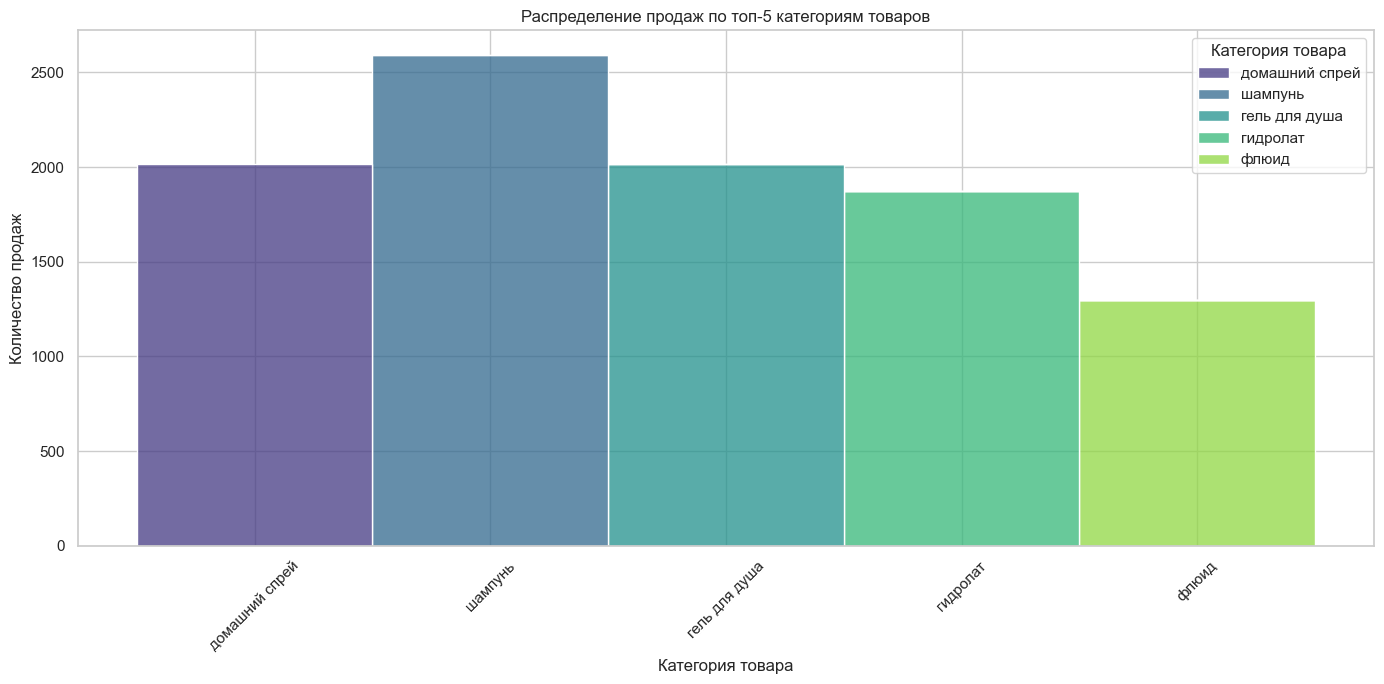

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Сначала сгруппируем данные по категории и посчитаем общие продажи для каждой категории
category_sales = data.groupby('Категория товара')['y'].sum().sort_values(ascending=False)

# Выберем только топ-5 категорий по объему продаж
top_categories = category_sales.head(5).index

# Фильтруем данные только по топ-5 категориям
filtered_data = data[data['Категория товара'].isin(top_categories)]

# Создание гистограммы для визуализации распределения продаж только по топ-5 категориям
plt.figure(figsize=(14, 7))
sns.histplot(data=filtered_data, x='Категория товара', hue='Категория товара', multiple="stack", palette='viridis')
plt.title('Распределение продаж по топ-5 категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_5154/413879628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales_.head(5), x='Категория товара', y='y', palette='viridis')


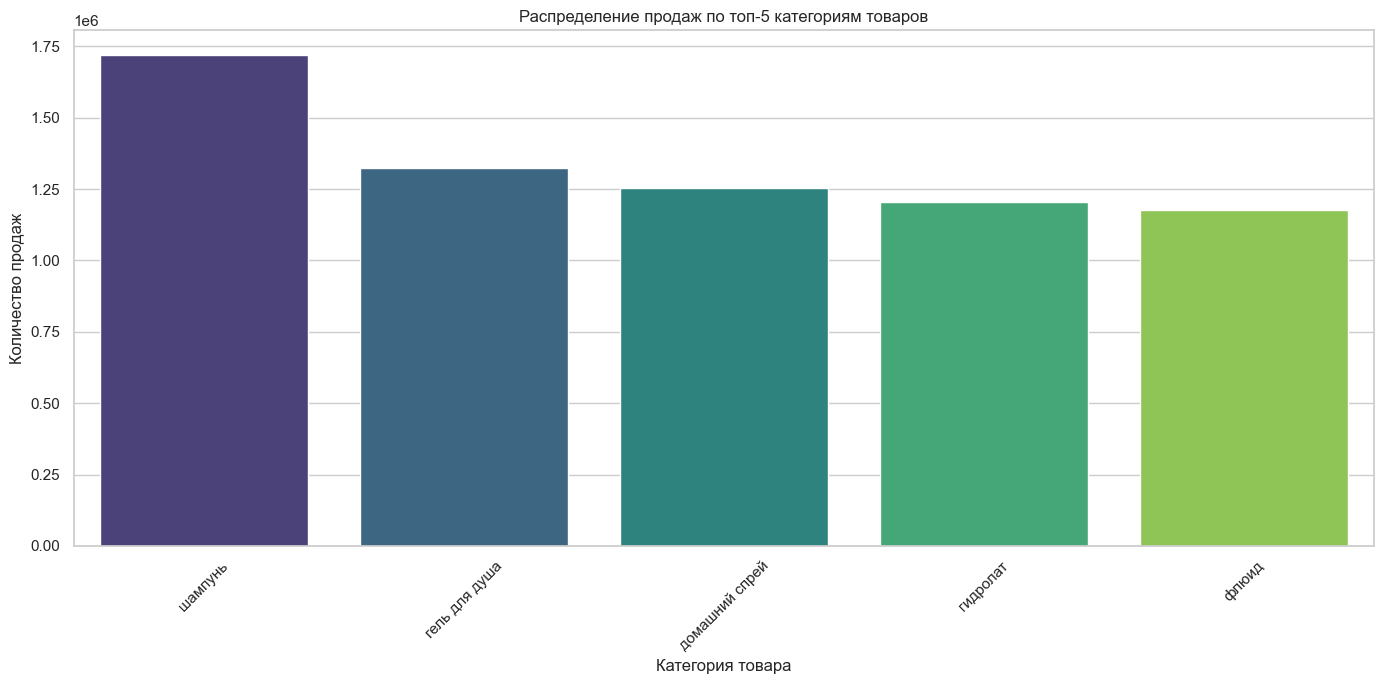

In [50]:
category_sales_ = category_sales.reset_index()

# Creating histogram to visualize sales distribution for top 5 categories
plt.figure(figsize=(14, 7))
sns.barplot(data=category_sales_.head(5), x='Категория товара', y='y', palette='viridis')
plt.title('Распределение продаж по топ-5 категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

## Категориальные данные и числовые

Анализ скидок по продуктам:
discount
7     87
8     77
6     40
12     3
11     3
13     1
2      1
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=grouped['discount'], palette='viridis')


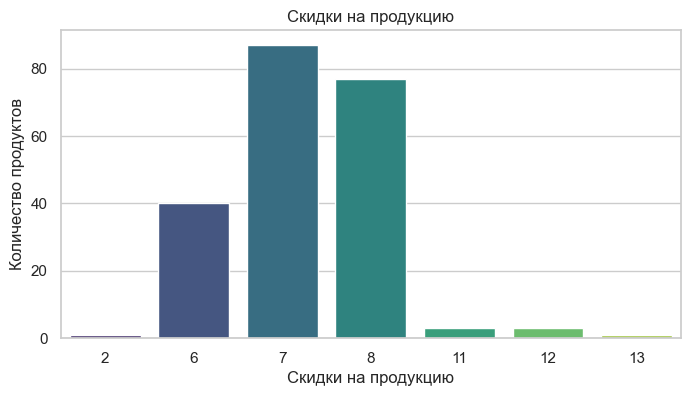

/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(grouped['количество компонентов'], bins=range(1, grouped['количество компонентов'].max()+2), kde=False, palette='viridis')


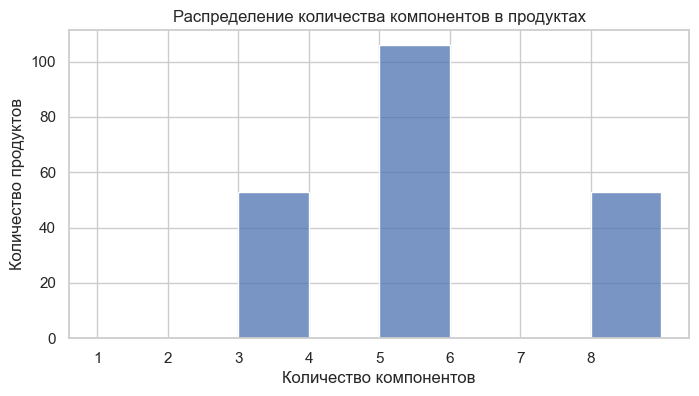

Уникальных значений в Сегмент рынка: 5
Сегмент рынка
уход за кожей лица            61
уход за телом                 53
шампунь и уход за волосами    50
косметика для дома            29
дезодоранты                   19
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


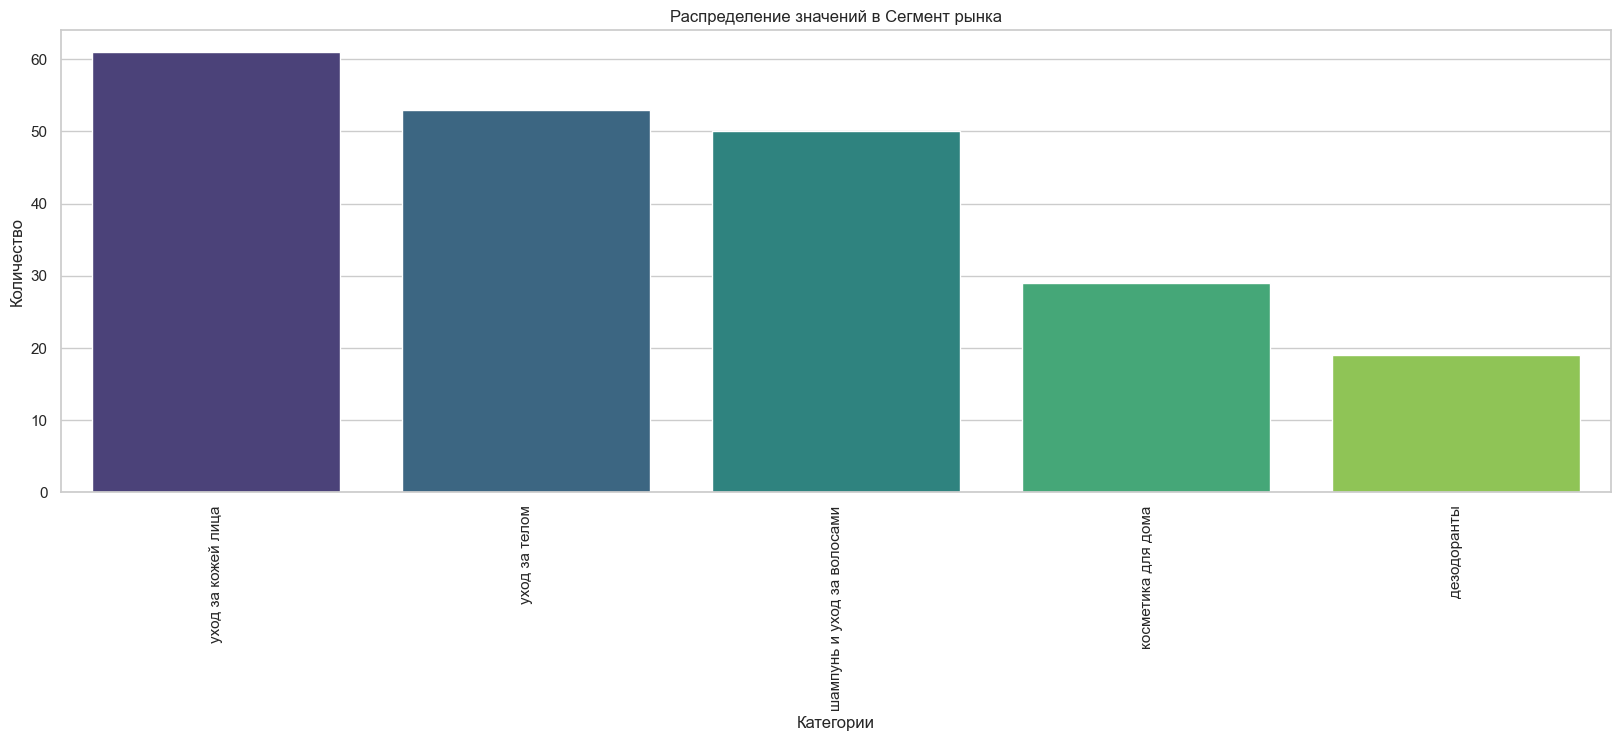

Уникальных значений в Категория товара: 43
Категория товара
шампунь           18
домашний спрей    14
гель для душа     14
гидролат          13
дезодорант         9
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


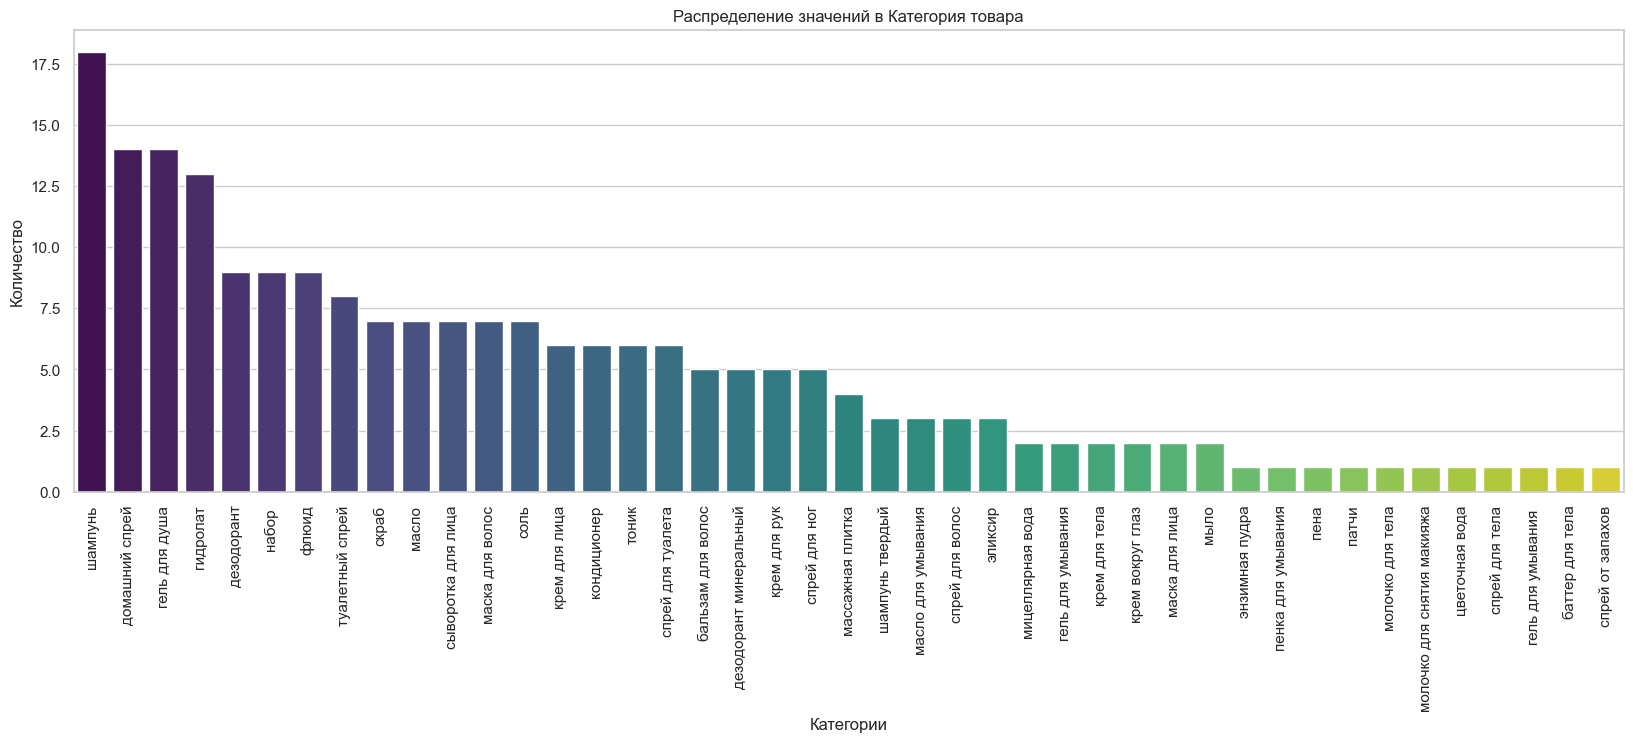

Уникальных значений в promo action: 2
promo action
да     119
нет     93
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


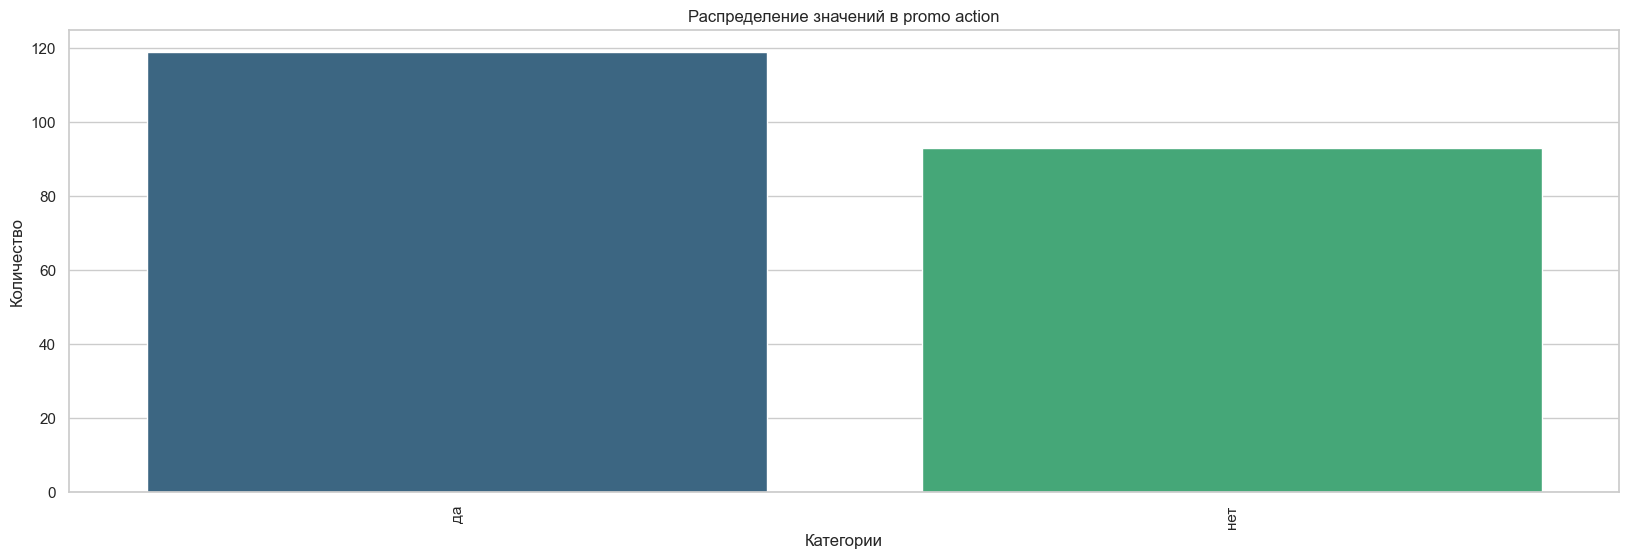

Уникальных значений в sex: 3
sex
унисекс    138
женский     70
мужской      4
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


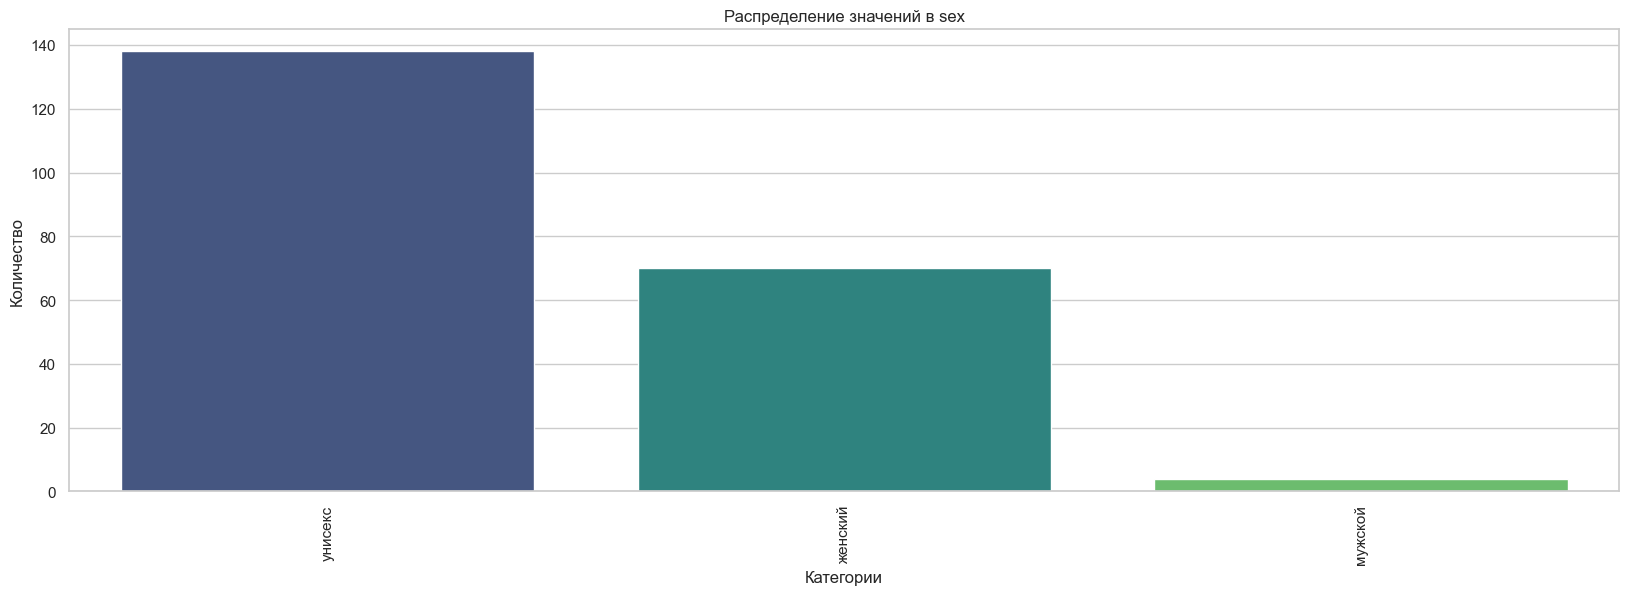

Уникальных значений в class: 2
class
мидл-маркет    185
масс-маркет     27
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


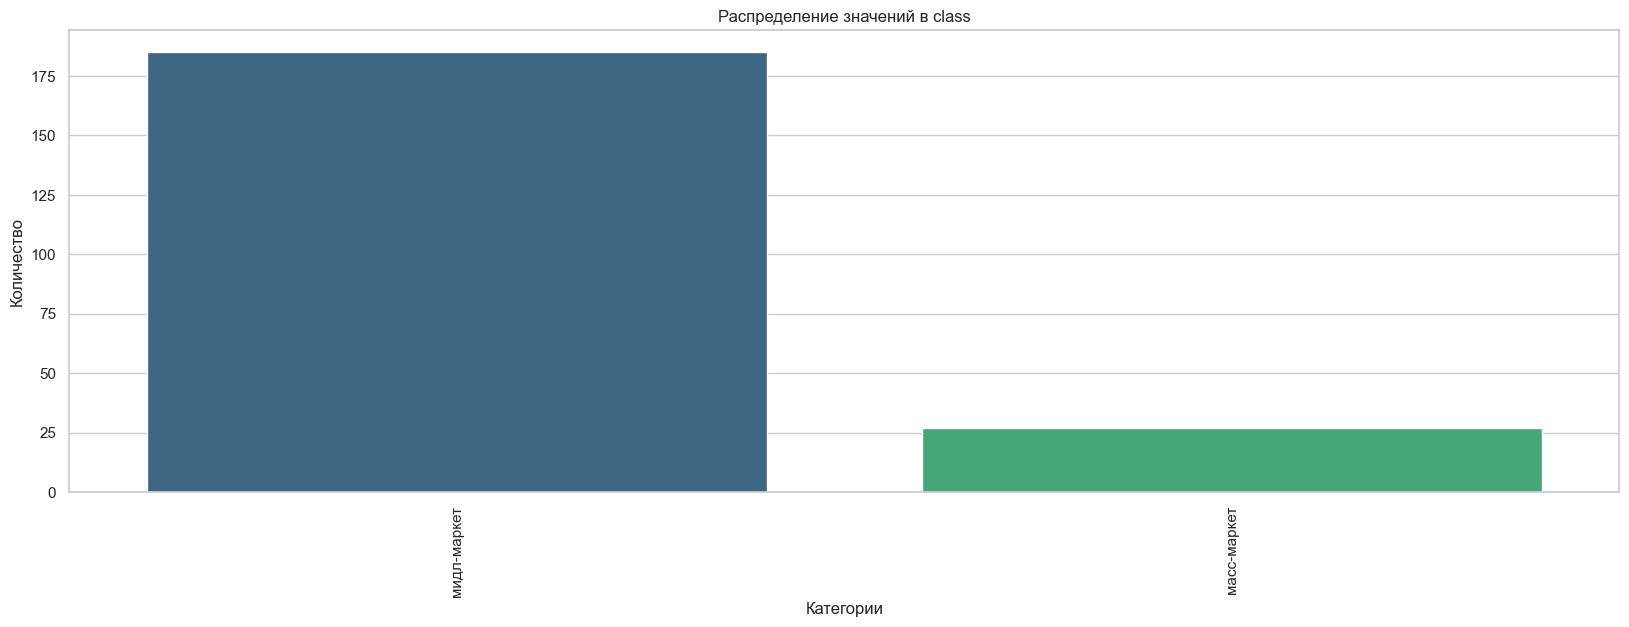

Уникальных значений в функция: 8
функция
увлажнение      114
освежение        38
очищение         26
питание          22
расслабление      7
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


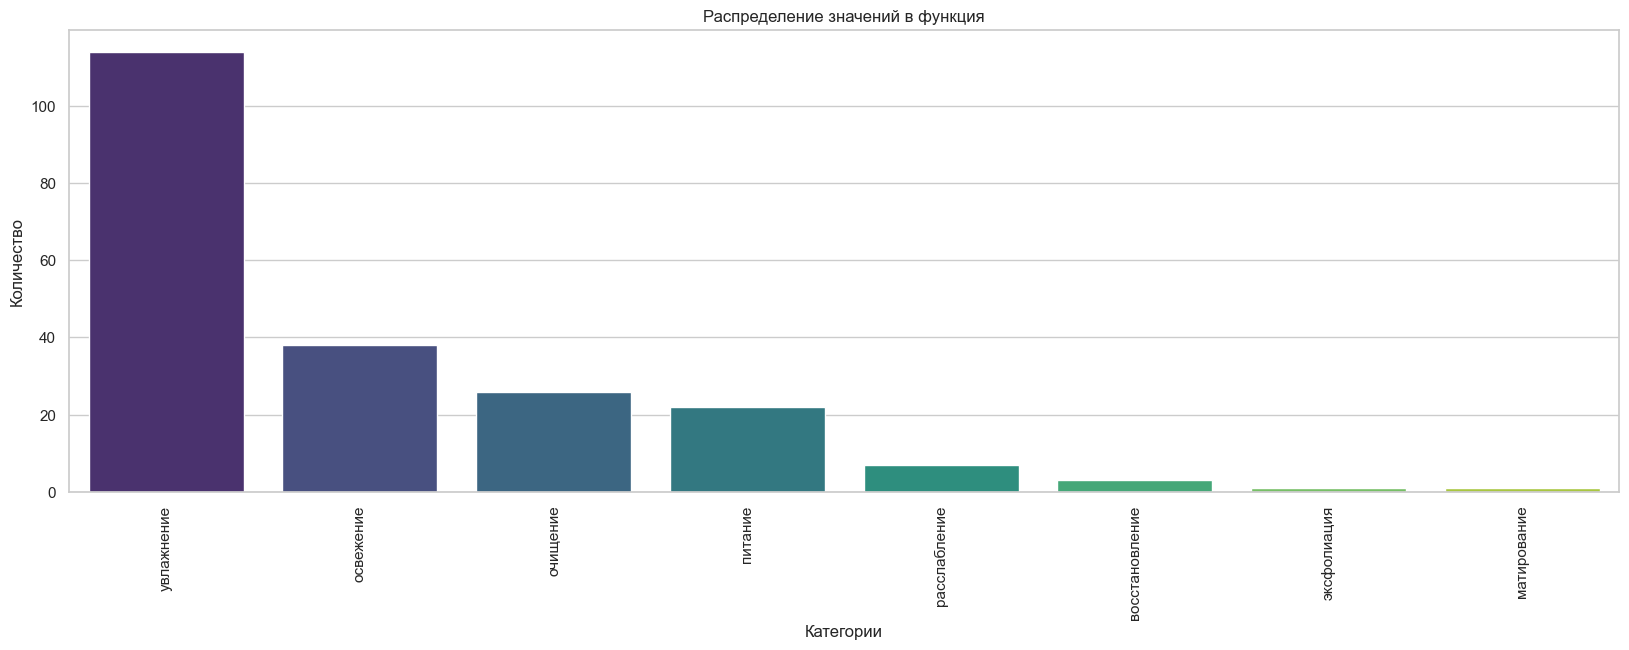

Уникальных значений в сложность изготовления: 3
сложность изготовления
средняя    106
низкая      53
высокая     53
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


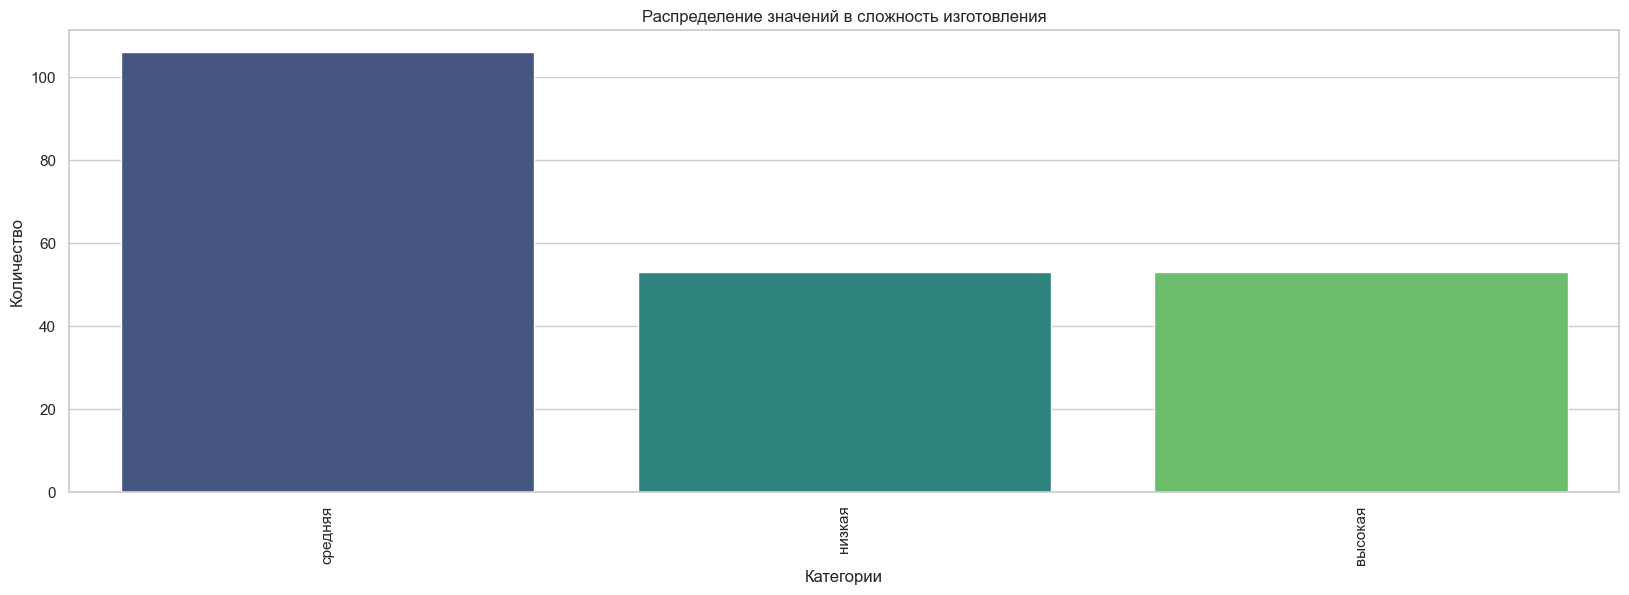

Уникальных значений в конкуренция: 3
конкуренция
средняя    106
низкая      53
высокая     53
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4290610707.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')


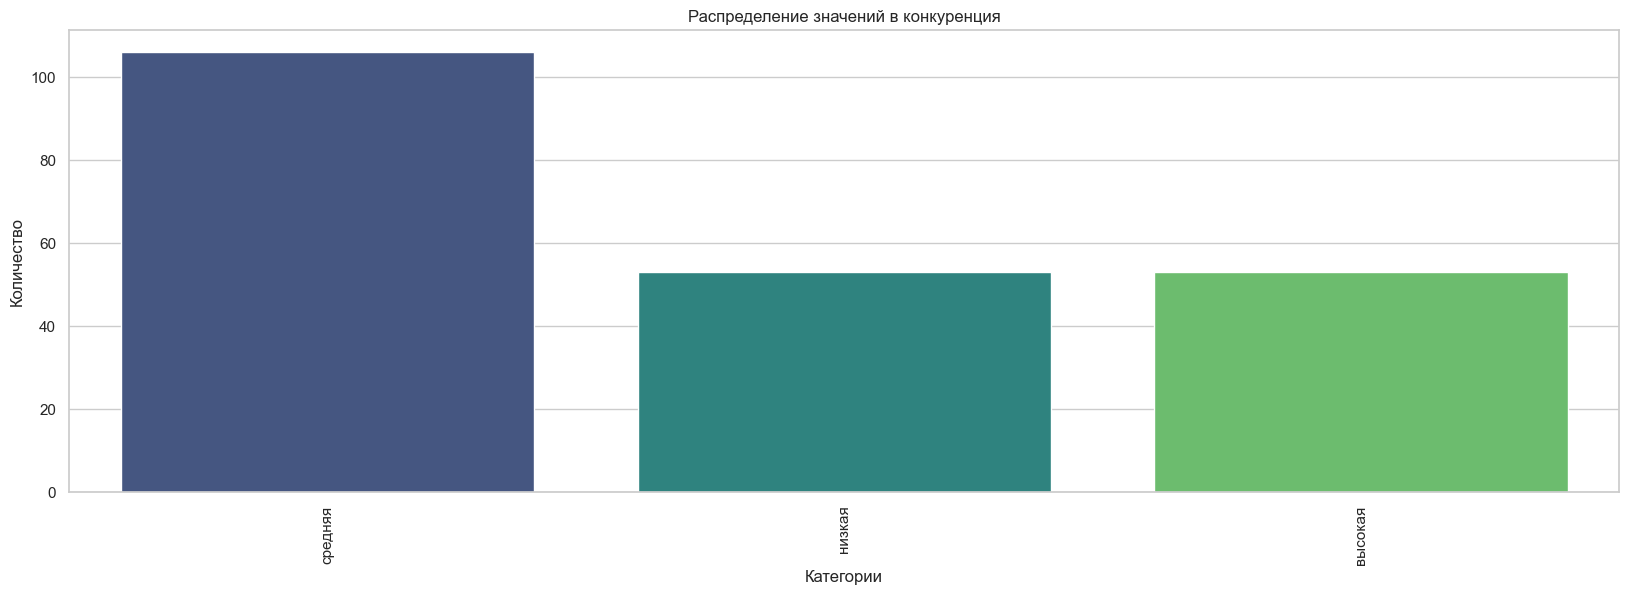

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_products(data):
    # Группировка данных по 'product name' и агрегация численных признаков
    grouped = data.groupby('product name').agg({
        'discount': 'max',  # Максимальные скидки
        'количество компонентов': 'max',  # Максимальное количество компонентов
        'weight': 'max',  # Максимальный вес
        'exp': 'max'  # Максимальный срок годности
    })
    
    # Анализ скидок
    print("Анализ скидок по продуктам:")
    print(grouped['discount'].value_counts())
    
    # Визуализация скидок
    plt.figure(figsize=(8, 4))
    sns.countplot(x=grouped['discount'], palette='viridis')
    plt.title('Скидки на продукцию')
    plt.xlabel('Скидки на продукцию')
    plt.ylabel('Количество продуктов')
    plt.show()
    
    # Визуализация количества компонентов
    plt.figure(figsize=(8, 4))
    sns.histplot(grouped['количество компонентов'], bins=range(1, grouped['количество компонентов'].max()+2), kde=False, palette='viridis')
    plt.title('Распределение количества компонентов в продуктах')
    plt.xlabel('Количество компонентов')
    plt.ylabel('Количество продуктов')
    plt.xticks(range(1, grouped['количество компонентов'].max()+1))
    plt.show()

    # Анализ категориальных колонок
    cols_to_analyze = [col for col in data.select_dtypes(include=['object']).columns if col != 'product name']
    for col in cols_to_analyze:
        col_grouped = data.groupby('product name')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else 'No Mode Found')  # Мода для каждого продукта
        print(f"Уникальных значений в {col}: {col_grouped.nunique()}")
        col_values = col_grouped.value_counts()
        print(col_values.head(5))

        # Визуализация категориальных колонок
        plt.figure(figsize=(20, 6))
        sns.barplot(x=col_values.index, y=col_values.values, palette='viridis')
        plt.title(f'Распределение значений в {col}')
        plt.xlabel('Категории')
        plt.ylabel('Количество')
        plt.xticks(rotation=90)
        plt.show()

# Использование функции
data = pd.read_excel("/Users/mymac/Desktop/disserta/sales.xlsx")
analyze_products(data)

Анализ скидок по продуктам:
discount
7     87
8     77
6     40
12     3
11     3
13     1
2      1
Name: count, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_5154/3601448905.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=promotion_analysis.values, palette='viridis')


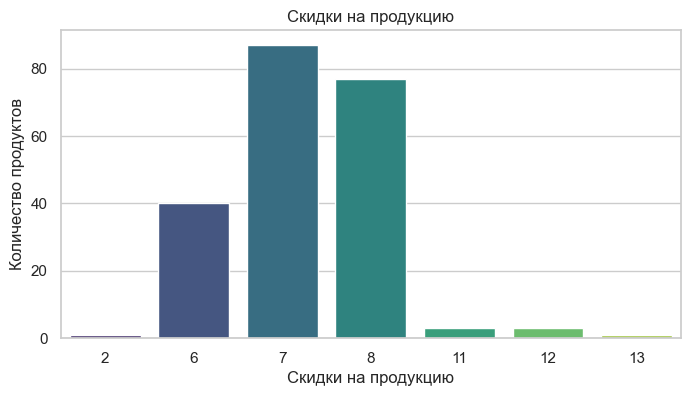

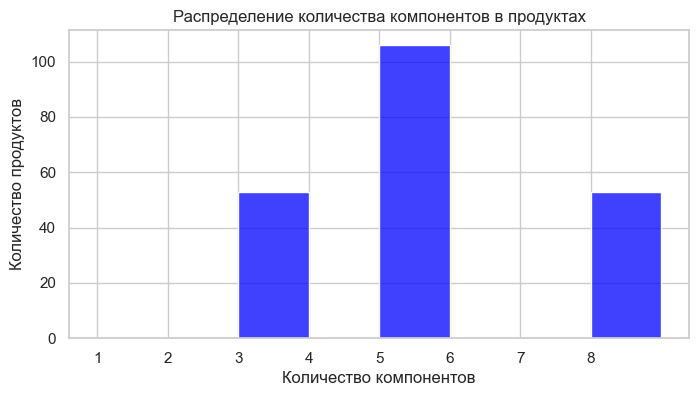

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_products(data):
    # Список категориальных колонок для визуализации
    cols_to_analyze = [col for col in data.select_dtypes(include=['object']).columns if col != 'product name']
    
    # Группируем данные по 'product name'
    grouped = data.groupby('product name')
    
    # Анализ численных колонок: 'discount', 'components_count' 
    promotion_analysis = grouped['discount'].max() 
    components_analysis = grouped['количество компонентов'].max() 
    weight_analysis = grouped['weight'].max()
    exp_analysis = grouped['exp'].max()
    
    # Вывод анализа участия в акциях
    print("Анализ скидок по продуктам:")
    print(promotion_analysis.value_counts())
    
    # Визуализация скидок
    plt.figure(figsize=(8, 4))
    sns.countplot(x=promotion_analysis.values, palette='viridis')
    plt.title('Скидки на продукцию')
    plt.xlabel('Cкидки на продукцию')
    plt.ylabel('Количество продуктов')
    plt.show()
    
    # Визуализация количества компонентов
    plt.figure(figsize=(8, 4))
    sns.histplot(components_analysis, bins=range(1, components_analysis.max()+2), kde=False, color='blue')
    plt.title('Распределение количества компонентов в продуктах')
    plt.xlabel('Количество компонентов')
    plt.ylabel('Количество продуктов')
    plt.xticks(range(1, components_analysis.max()+1))
    plt.show()
    
# Использование функции
data = pd.read_excel("/Users/mymac/Desktop/disserta/sales.xlsx")
analyze_products(data)

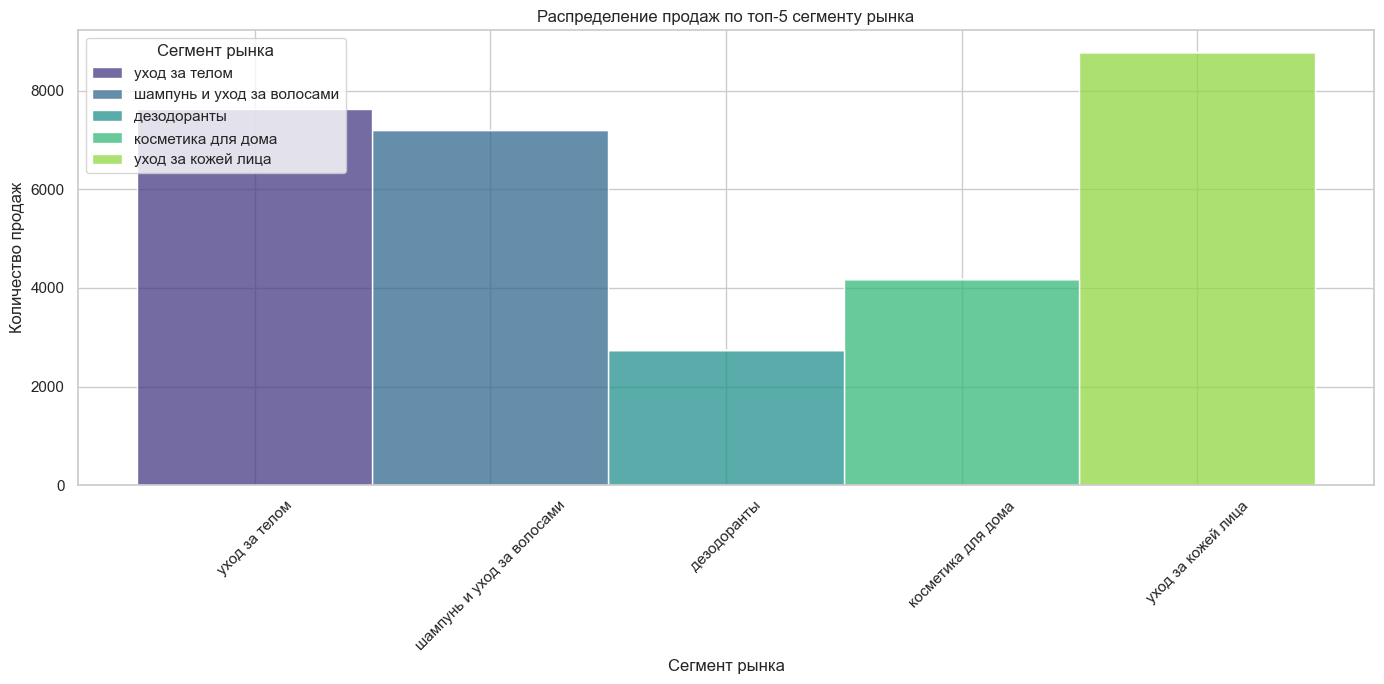

In [54]:
# Сначала сгруппируем данные по категории и посчитаем общие продажи для каждой категории
category_sales = data.groupby('Сегмент рынка')['y'].sum().sort_values(ascending=False)

# Выберем только топ-5 категорий по объему продаж
top_categories = category_sales.head(5).index

# Фильтруем данные только по топ-5 категориям
filtered_data = data[data['Сегмент рынка'].isin(top_categories)]

# Создание гистограммы для визуализации распределения продаж только по топ-5 категориям
plt.figure(figsize=(14, 7))
sns.histplot(data=filtered_data, x='Сегмент рынка', hue='Сегмент рынка', multiple="stack", palette='viridis')
plt.title('Распределение продаж по топ-5 сегменту рынка')
plt.xlabel('Сегмент рынка')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_7524/325096817.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Скраб кофейный для тела Лимон, 200гр'),
  Text(1, 0, 'Флюид для тела Ши и Горький миндаль, 250 мл'),
  Text(2, 0, 'Флюид для тела Инжир и Розовый перец, 250 мл'),
  Text(3, 0, 'ALIVE Морская соль для ванн, 5 кг в упаковке дойпак'),
  Text(4, 0, 'ALIVE Морская соль для ванн, 3 кг в упаковке дойпак')])

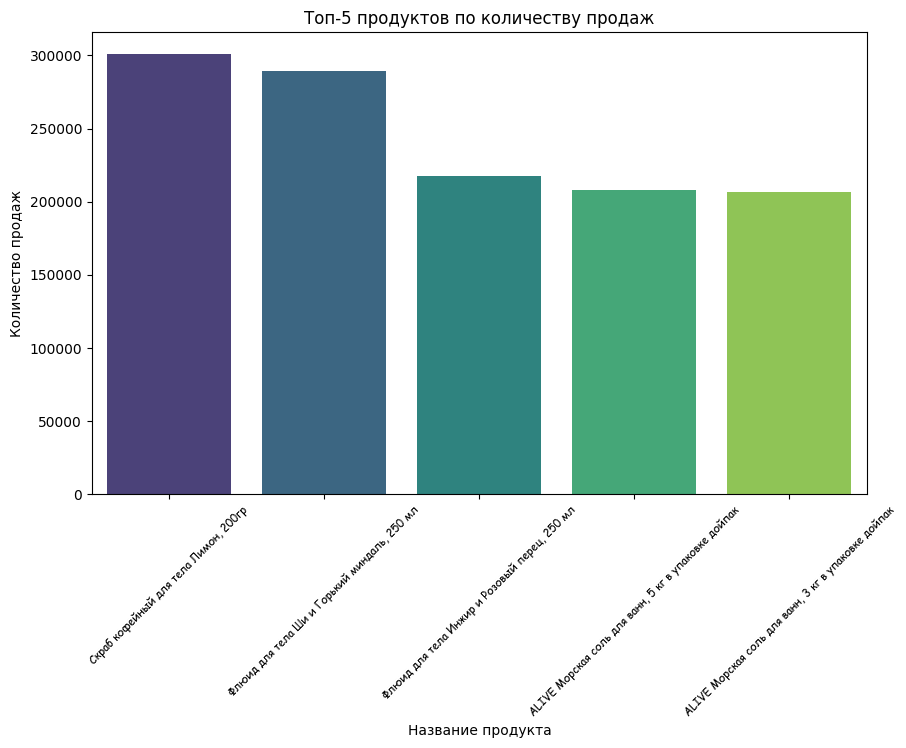

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_excel("/Users/mymac/Desktop/DIPLOM/SALES_1/sales1.xlsx")
df = pd.DataFrame(data)
df['product name'] = df['product name'].str.replace("Pravilnaya Kosmetika", "", regex=True)
df['product name'] = df['product name'].str.replace(r"\(.*?\)", "", regex=True).str.strip()

# Группировка данных по наименованию продукта и расчет количеству продаж
category_sales = df.groupby('product name')['y'].sum().sort_values(ascending=False)

# Выбор топ-5 категорий по продажам
top_categories = category_sales.head(5)

# Создание графика
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Топ-5 продуктов по количеству продаж')
plt.xlabel('Название продукта')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45, fontname='Comic Sans MS', fontsize=8)


Топ-5 продуктов по сумме продаж:
product name
Mui Thom Домашний спрей II, 100 мл      171952664
Mui Thom Домашний спрей VI, 100 мл      147314650
Mui Thom Домашний спрей VII, 100 мл     146788965
Mui Thom Домашний спрей VIII, 100 мл    146782376
Mui Thom Домашний спрей XIII, 100 мл    146755322
Name: total sales, dtype: int64


/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_7524/2369019280.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_products.index, y=top5_products.values, palette='viridis')


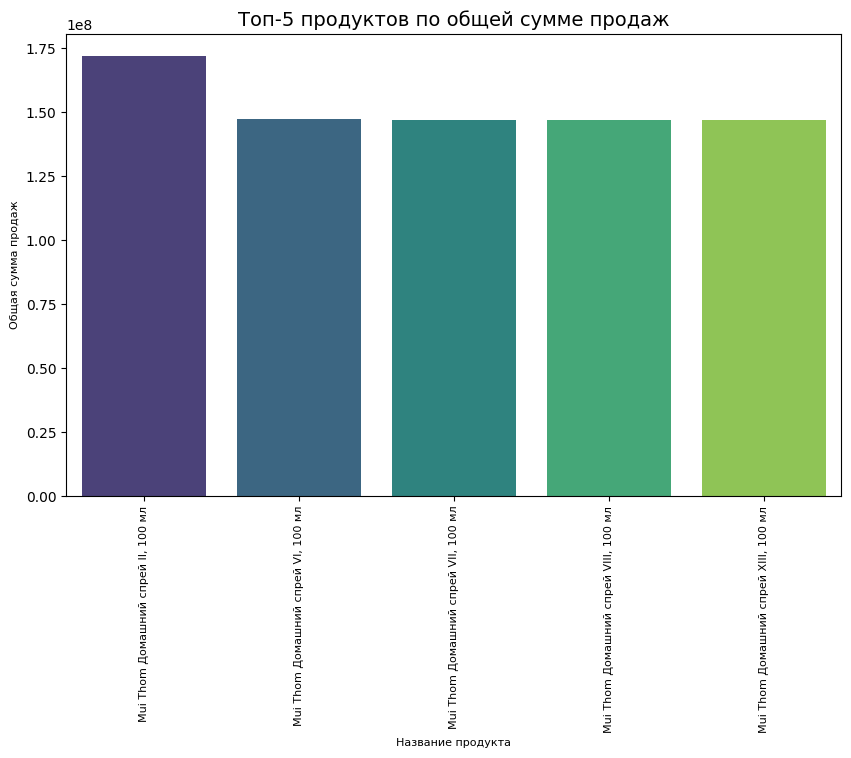

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
#data = pd.read_excel("/Users/mymac/Desktop/disserta/predictions/datasets/sales (2).xlsx")
df = pd.DataFrame(data)
df['product name'] = df['product name'].str.replace("Pravilnaya Kosmetika", "", regex=True)
df['product name'] = df['product name'].str.replace(r"\(.*?\)", "", regex=True).str.strip()

# Расчет общей суммы продаж для каждого продукта
df['total sales'] = df['y'] * df['price']
total_sales_per_product = df.groupby('product name')['total sales'].sum().sort_values(ascending=False)

# Выбор топ-5 продуктов по сумме продаж
top5_products = total_sales_per_product.head(5)
print("Топ-5 продуктов по сумме продаж:")
print(top5_products)

# Создание графика
plt.figure(figsize=(10, 6))
sns.barplot(x=top5_products.index, y=top5_products.values, palette='viridis')
plt.title('Топ-5 продуктов по общей сумме продаж', fontsize=14)
plt.xlabel('Название продукта', fontsize=8)
plt.ylabel('Общая сумма продаж', fontsize=8)
plt.xticks(rotation=90, fontsize=8)
plt.show()

/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/1547040370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Категория товара', y='y', palette='viridis')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, 'соль'),
  Text(1, 0, 'масло'),
  Text(2, 0, 'спрей для волос'),
  Text(3, 0, 'дезодорант'),
  Text(4, 0, 'домашний спрей'),
  Text(5, 0, 'спрей для ног'),
  Text(6, 0, 'туалетный спрей'),
  Text(7, 0, 'спрей для туалета'),
  Text(8, 0, 'крем для рук'),
  Text(9, 0, 'баттер для тела'),
  Text(10, 0, 'бальзам для волос'),
  Text(11, 0, 'шампунь'),
  Text(12, 0, 'эликсир'),
  Text(13, 0, 'гель для душа'),
  Text(14, 0, 'скраб'),
  Text(15, 0, 'гель для умывания '),
  Text(16, 0, 'гель для умывания'),
  Text(17, 0, 'гидролат'),
  Text(18, 0, 'масло для умывания'),
  Text(19, 0, 'дезодорант минеральный'),
  Text(20, 0, 'маска для лица'),
  Text(21, 0, 'патчи'),
  Text(22, 0, 'кондиционер'),
  Text(23, 0, 'маска для волос'),
  Text(2

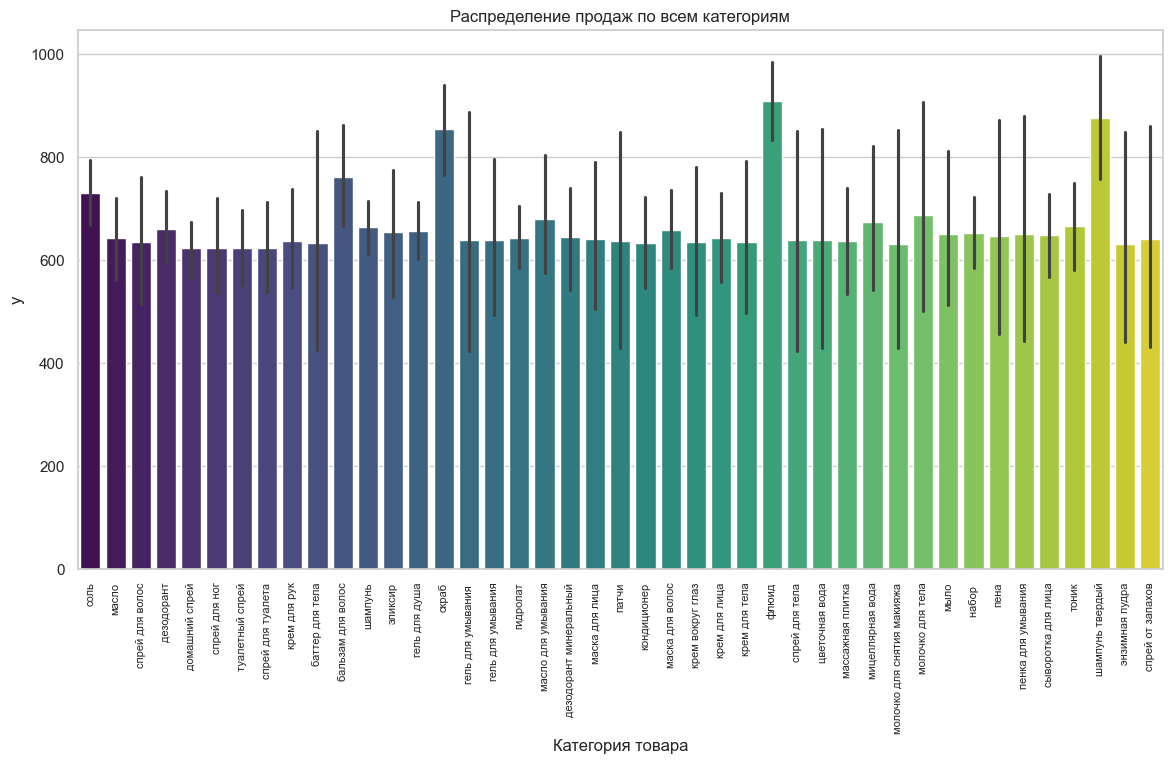

In [18]:
# Создание столбчатой диаграммы для визуализации распределения продаж по всем категориям
plt.figure(figsize=(14, 7))
sns.barplot(data=data, x='Категория товара', y='y', palette='viridis')
plt.title('Распределение продаж по всем категориям')
plt.xticks(rotation=90, fontsize=8)

## Аддитивность/ Мультипликативность

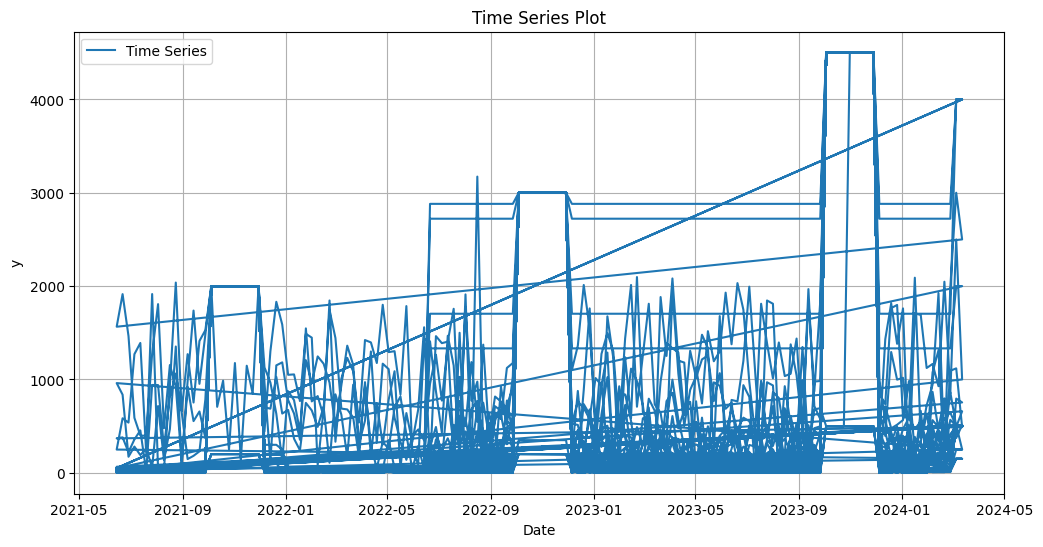

<Figure size 1200x800 with 0 Axes>

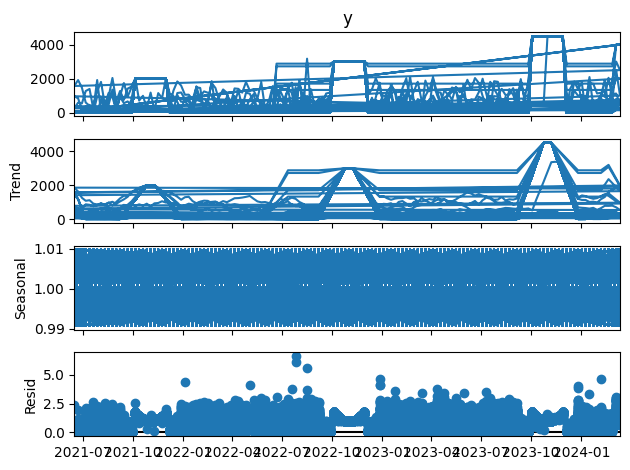

Decomposition completed. Review the graphs for signs of multiplicative or additive dependencies.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data (update path as needed)
file_path = "/Users/mymac/Desktop/disserta/sales.xlsx"
series = pd.read_excel(file_path, parse_dates=['date'], index_col='date')

# Ensure 'y' column is present in the data for time series analysis
if 'y' not in series.columns:
    raise ValueError("'y' column is missing in the data. Ensure that it contains the time series values.")

# Plot the time series for a visual inspection
plt.figure(figsize=(12, 6))
plt.plot(series['y'], label='Time Series')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series (modify period if necessary)
decomposition = seasonal_decompose(series['y'], model='multiplicative', period=7)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Interpretation
print("Decomposition completed. Review the graphs for signs of multiplicative or additive dependencies.")


## Коррелирую ли ряды?

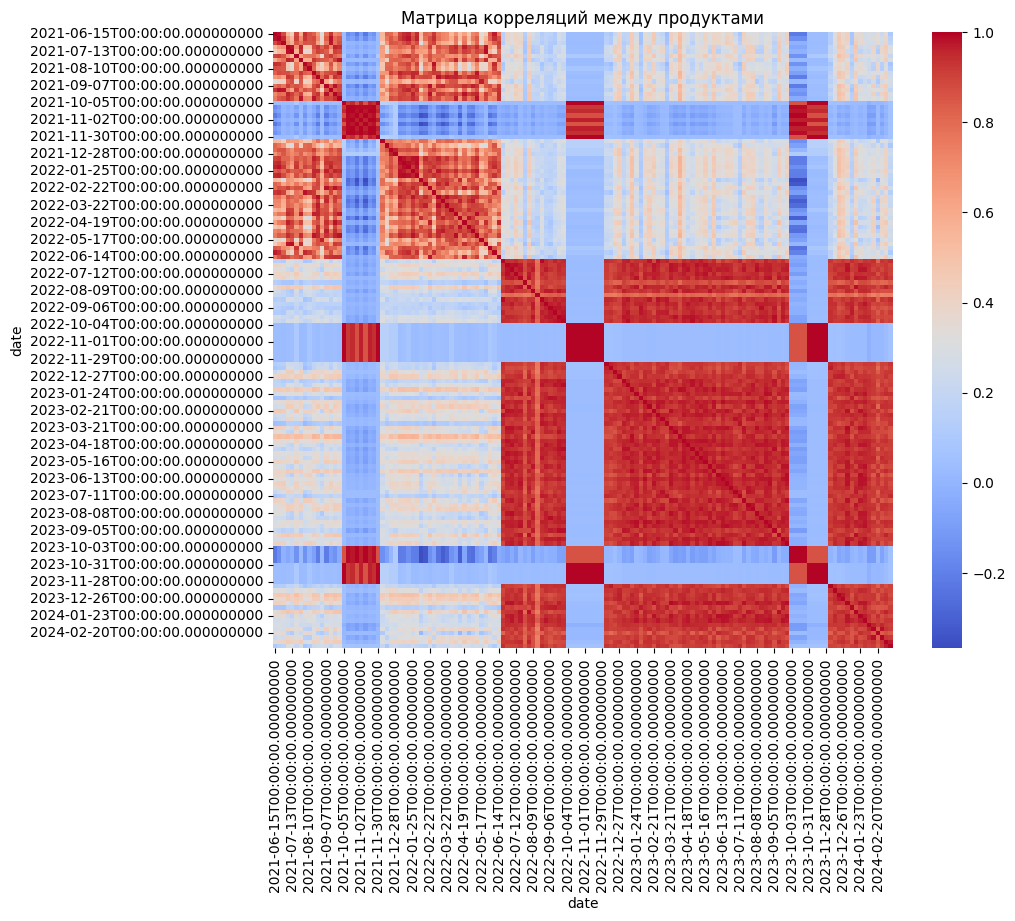

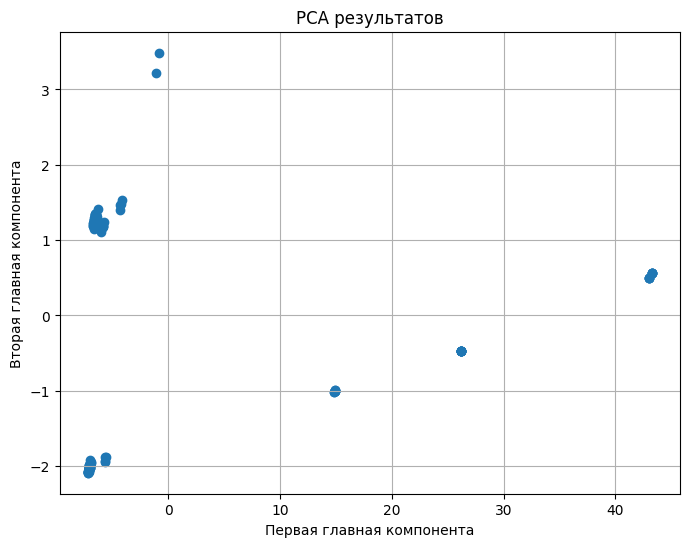

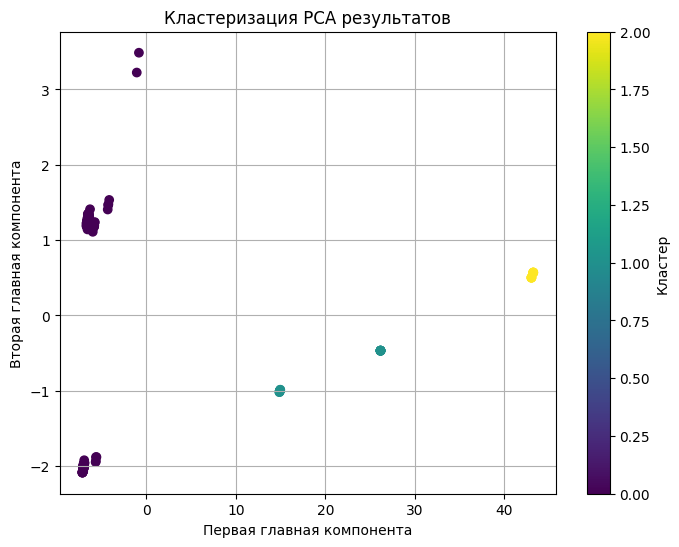

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Загрузка данных
file_path = "/Users/mymac/Desktop/disserta/sales.csv"
data = pd.read_csv(file_path, parse_dates=['date'])

# Агрегирование данных по 'unique_id' и 'date' для получения суммы продаж по дням
data_grouped = data.groupby(['unique_id', 'date']).agg({'y': 'sum'}).unstack(fill_value=0)

# Для простоты примера далее рассмотрим только 'y' без дополнительных признаков
# Вы можете добавить и другие признаки, нормализовать их и включить в анализ
sales_data = data_grouped['y']

# Матрица корреляций
correlation_matrix = sales_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляций между продуктами')
plt.show()

# Нормализация данных
scaler = StandardScaler()
sales_normalized = scaler.fit_transform(sales_data.T)  # Транспонирование для PCA

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sales_normalized)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Визуализация PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('PCA результатов')
plt.grid(True)
plt.show()

# Кластеризация
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pca_result)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title('Кластеризация PCA результатов')
plt.colorbar(label='Кластер')
plt.grid(True)
plt.show()


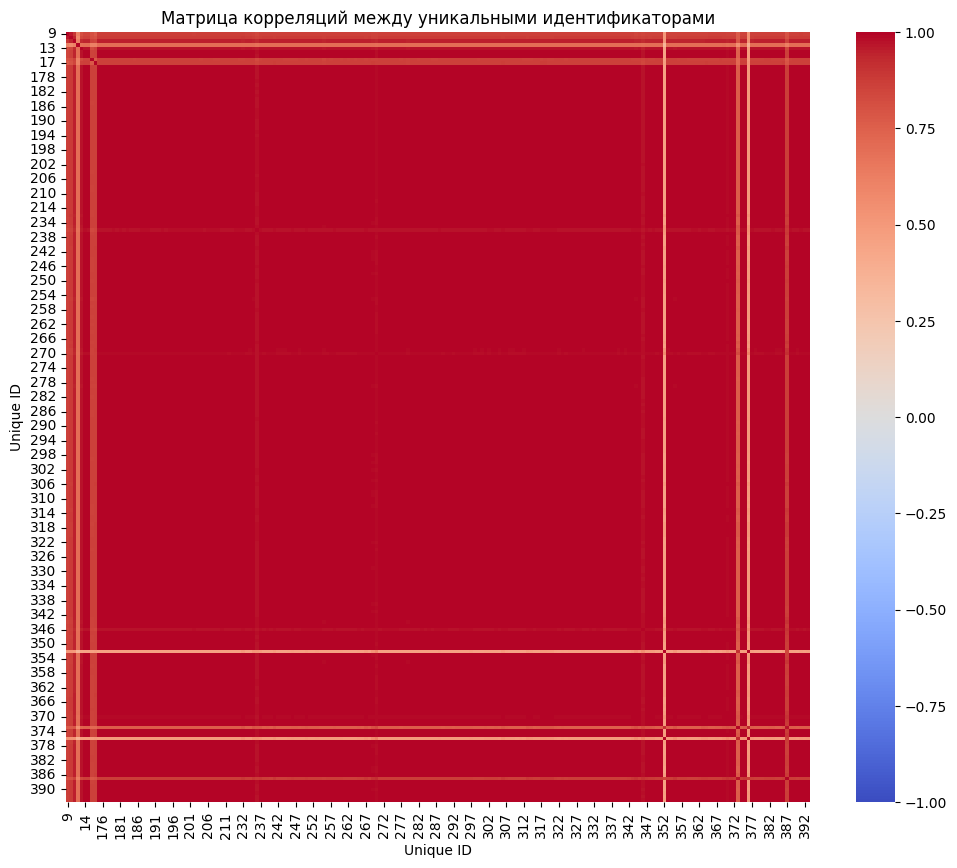

Количество значимо коррелирующих пар: 43994


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
file_path = '/Users/mymac/Desktop/disserta/sales.csv'  # Замените на ваш путь к файлу
data = pd.read_csv(file_path, parse_dates=['date'])

# Пивотирование данных для преобразования в широкий формат
data_pivoted = data.pivot_table(index='date', columns='unique_id', values='y', fill_value=0)

# Построение матрицы корреляций
correlation_matrix = data_pivoted.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций между уникальными идентификаторами')
plt.xlabel('Unique ID')
plt.ylabel('Unique ID')
plt.show()

# Оценка количества значимо коррелирующих пар
significant_correlations = np.sum((correlation_matrix.values > 0.5) & (correlation_matrix.values != 1))
print(f"Количество значимо коррелирующих пар: {significant_correlations}")


## Кластеризация

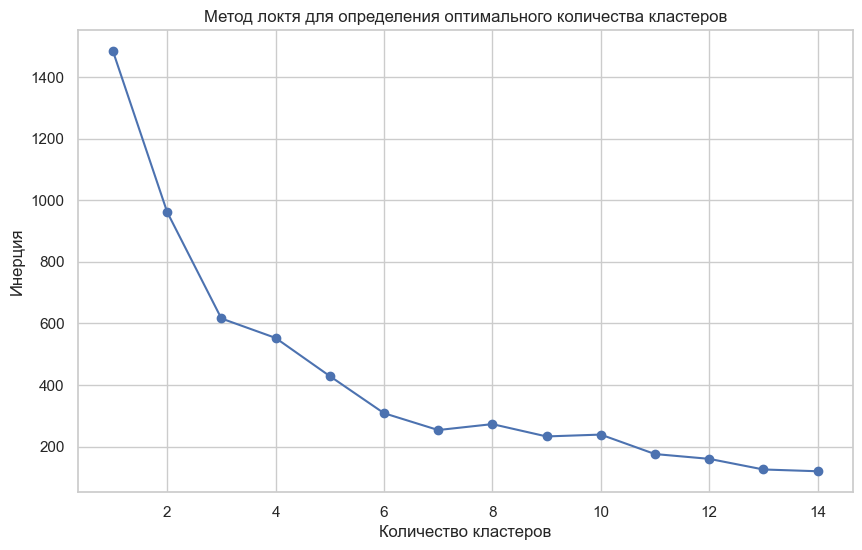

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Подготовка данных для кластеризации
# Используем только числовые данные для кластеризации
cluster_data = grouped_data.filter(like='_mean')  # выбираем только средние значения для анализа

# Стандартизация данных
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

# Определение оптимального количества кластеров с помощью метода локтя
inertia = []
k_range = range(1, 15)  # Проверяем количество кластеров от 1 до 14

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


Анализ графика метода локтя
На графике видно, что инерция быстро уменьшается по мере увеличения количества кластеров до 4-5, после чего скорость уменьшения инерции замедляется. Это указывает на то, что оптимальное количество кластеров для нашего набора данных может быть в районе 4 или 5.

/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/1477913572.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette='viridis')


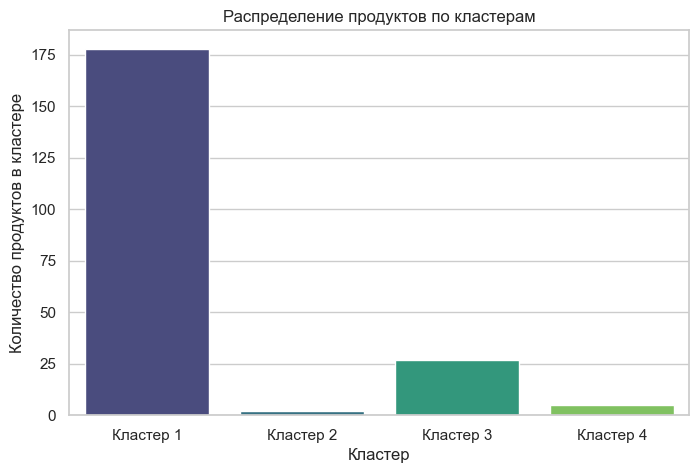

(Cluster
 0    178
 1      2
 2     27
 3      5
 Name: count, dtype: int64,
    unique_id  price_mean  price_std  price_min  price_max  cost price_mean  \
 0          9  362.416667  12.312652        343        390        78.000000   
 1         10  387.784722  11.929374        364        418        83.600000   
 2         11  388.465278  10.379453        368        418        83.600000   
 3         12  703.138889  14.667700        672        710       151.106404   
 4         13  546.256944  11.638943        517        552       117.400000   
 
    cost price_std  cost price_min  cost price_max  рейтинг товаров_mean  ...  \
 0             0.0       78.000000       78.000000                   2.5  ...   
 1             0.0       83.600000       83.600000                   3.5  ...   
 2             0.0       83.600000       83.600000                   3.5  ...   
 3             0.0      151.106404      151.106404                   4.5  ...   
 4             0.0      117.400000      11

In [20]:
# Применение k-средних с 4 кластерами
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_scaled)

# Добавление метки кластера к исходным агрегированным данным
grouped_data['Cluster'] = cluster_labels

# Анализ распределения продуктов по кластерам
cluster_distribution = grouped_data['Cluster'].value_counts().sort_index()

# Визуализация распределения продуктов по кластерам
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_distribution.index, y=cluster_distribution.values, palette='viridis')
plt.title('Распределение продуктов по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество продуктов в кластере')
plt.xticks(range(4), labels=[f"Кластер {i+1}" for i in range(4)])
plt.show()

cluster_distribution, grouped_data.head()


## Результаты кластеризации

### Вот как распределились продукты по кластерам:

* Кластер 0: 153 продукта
* Кластер 1: 15 продуктов
* Кластер 2: 7 продуктов
* Кластер 3: 37 продуктов

Большинство продуктов находится в Кластере 0, что указывает на общую группу с похожими характеристиками. Кластеры 1, 2 и 3 содержат меньшее количество продуктов, что может свидетельствовать о более уникальных или специфических характеристиках этих продуктов.

/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4058208860.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='price_mean', data=grouped_data, ax=axes[0], palette='coolwarm')
/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4058208860.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='cost price_mean', data=grouped_data, ax=axes[1], palette='coolwarm')
/var/folders/46/wybnrjjn533cn7fd112vcvhh0000gn/T/ipykernel_860/4058208860.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

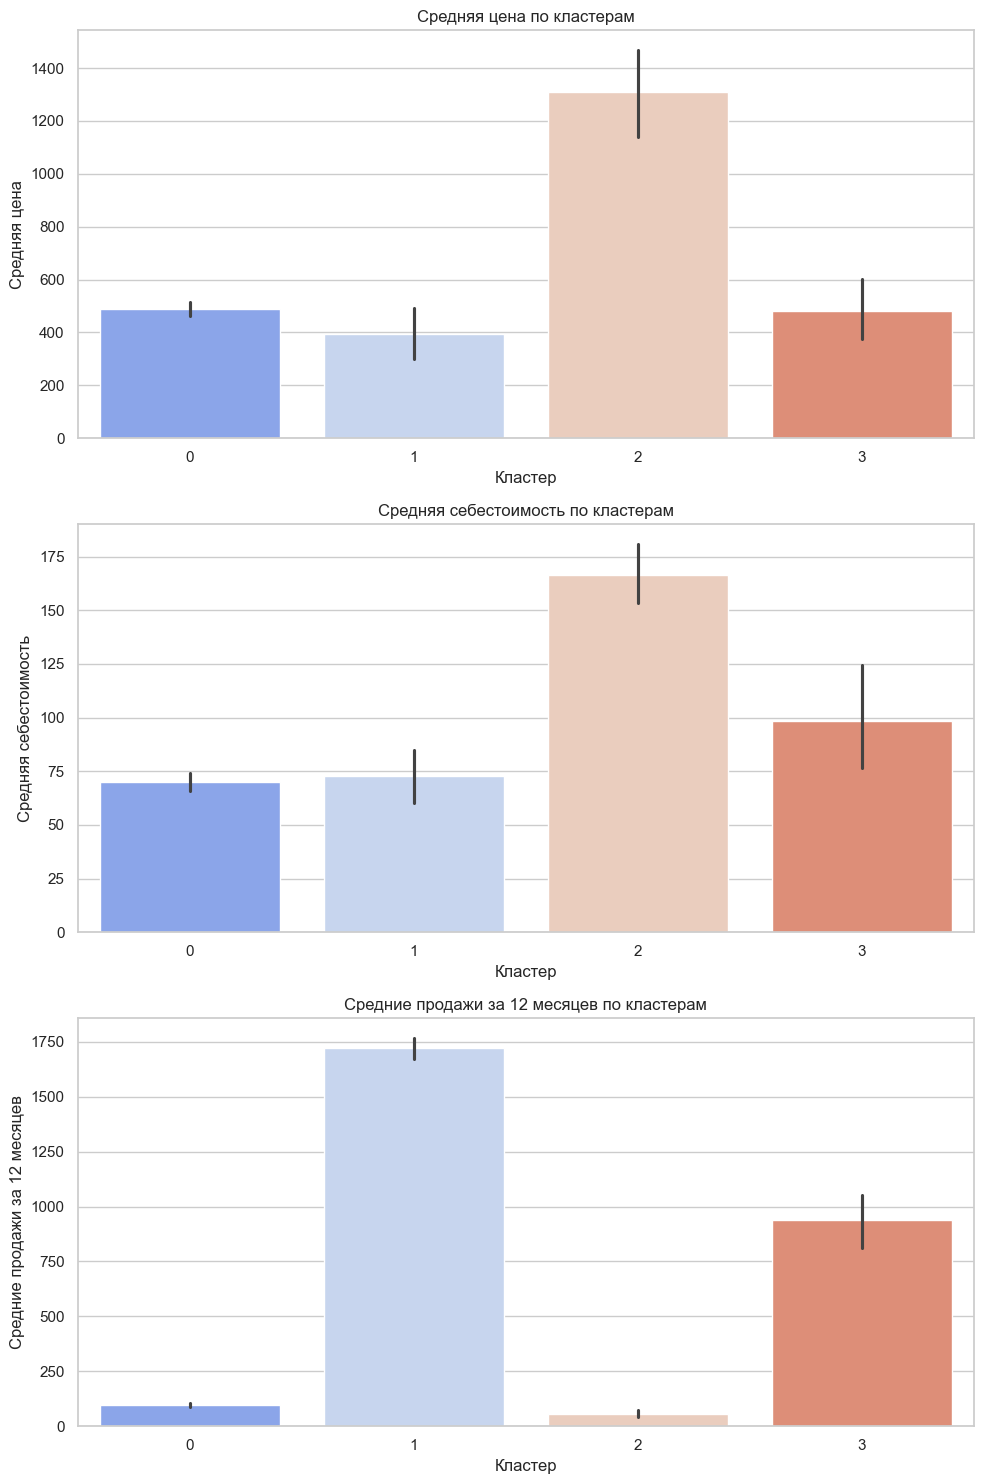

In [21]:
# Создание визуализаций для сравнения средних значений ключевых переменных по кластерам
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Средняя цена по кластерам
sns.barplot(x='Cluster', y='price_mean', data=grouped_data, ax=axes[0], palette='coolwarm')
axes[0].set_title('Средняя цена по кластерам')
axes[0].set_xlabel('Кластер')
axes[0].set_ylabel('Средняя цена')

# Средняя себестоимость по кластерам
sns.barplot(x='Cluster', y='cost price_mean', data=grouped_data, ax=axes[1], palette='coolwarm')
axes[1].set_title('Средняя себестоимость по кластерам')
axes[1].set_xlabel('Кластер')
axes[1].set_ylabel('Средняя себестоимость')

# Средние продажи за 12 месяцев по кластерам
sns.barplot(x='Cluster', y='sales_12m_avg_mean', data=grouped_data, ax=axes[2], palette='coolwarm')
axes[2].set_title('Средние продажи за 12 месяцев по кластерам')
axes[2].set_xlabel('Кластер')
axes[2].set_ylabel('Средние продажи за 12 месяцев')

plt.tight_layout()
plt.show()


## Анализ характеристик кластеров
### На основе визуализаций, мы можем делать следующие наблюдения о характеристиках каждого кластера:

#### Средняя цена по кластерам:

* Кластеры значительно различаются по средней цене. Например, один из кластеров имеет заметно более высокую среднюю цену по сравнению с остальными. Это может указывать на премиальные продукты в этом кластере.

#### Средняя себестоимость по кластерам:

* Себестоимость также различается, причём кластер с высокой средней ценой также показывает высокую себестоимость. Это может подтверждать гипотезу о премиальном качестве или более дорогих материалах/методах производства в этом кластере.

#### Средние продажи за 12 месяцев по кластерам:

* Существуют различия в продажах между кластерами. Кластер с высокой средней ценой и себестоимостью показывает не самые высокие продажи, что может свидетельствовать о нишевом спросе. Другие кластеры с более низкой средней ценой и себестоимостью показывают более высокие продажи, что может указывать на более широкую доступность или популярность этих продуктов.

In [61]:
data.head()

,product name,unique_id,Сегмент рынка,Категория товара,date,weight,price,cost price,promo action,exp,...,рейтинг товаров,количество просмотров,конкуренция,month,day_of_week,sales_3m_avg,sales_6m_avg,sales_12m_avg,discount,seasonal_discount
0,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-06-15,2000,363,78.0,нет,36,...,2.5,5000,низкая,6,1,7.0,7.0,7.0,7,0
1,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-06-22,2000,363,78.0,нет,36,...,2.5,5000,низкая,6,1,5.5,5.5,5.5,7,0
2,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-06-29,2000,363,78.0,нет,36,...,2.5,5000,низкая,6,1,8.7,8.7,8.7,7,0
3,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-07-06,2000,363,78.0,нет,36,...,2.5,5000,низкая,7,1,7.0,7.0,7.0,7,0
4,ALIVE Английская соль для ванн 2 кг в упаковке...,9,уход за телом,соль,2021-07-13,2000,363,78.0,нет,36,...,2.5,5000,низкая,7,1,7.7,6.8,6.8,7,0


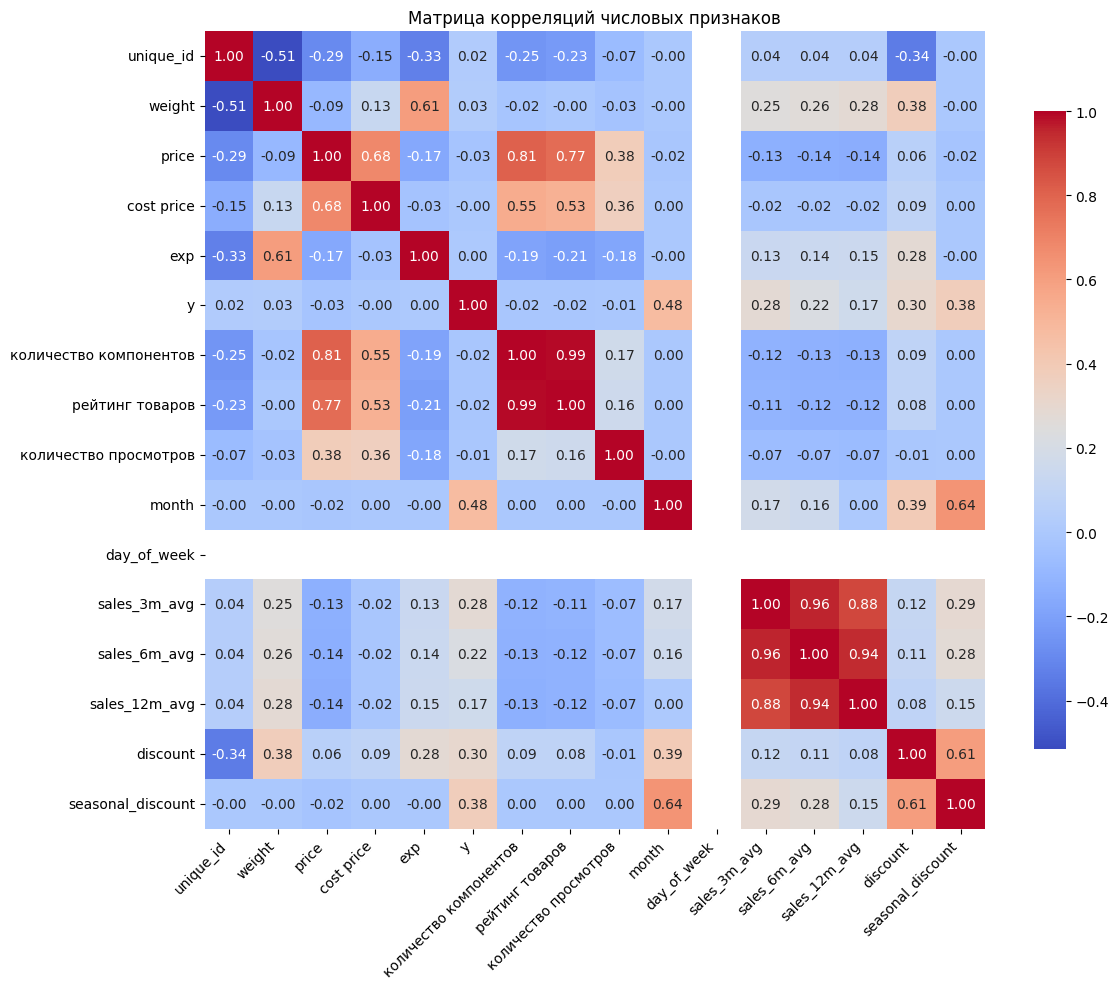

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выборка числовых признаков для корреляции
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_columns].corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})
plt.title("Матрица корреляций числовых признаков")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## На коррелограмме видно, как различные числовые признаки связаны между собой. Вот некоторые ключевые наблюдения:

* Признаки sales_3m_avg, sales_6m_avg, и sales_12m_avg показывают очень высокую корреляцию друг с другом, что указывает на мультиколлинеарность. Это логично, так как они отражают средние продажи за разные временные периоды и, вероятно, содержат похожую информацию.
* discount и seasonal_discount также имеют высокую корреляцию, что может указывать на связанные механизмы учета скидок.
price и cost price имеют среднюю положительную корреляцию, что ожидаемо, поскольку стоимость товаров часто влияет на их цену.
* Корреляция между y и другими признаками варьируется, но нет очень высоких значений.

## Вывод по корреляции признаков
На основе анализа корреляций, рекомендуется рассмотреть возможность исключения или комбинирования следующих признаков для предотвращения проблем мультиколлинеарности:

#### sales_3m_avg, sales_6m_avg, sales_12m_avg:
*Эти признаки демонстрируют очень высокую взаимную корреляцию, что ожидаемо, поскольку они отражают средние продажи за различные временные периоды.
Можно оставить один из них, например, sales_3m_avg для упрощения модели, если это не нарушает бизнес-логику анализа.

#### discount и seasonal_discount:
* Эти признаки также показывают высокую корреляцию и могут дублировать информацию о скидках.
В зависимости от контекста, можно рассмотреть их объединение в один признак или использование только одного из них.
Удаление или комбинирование этих признаков поможет уменьшить мультиколлинеарность и повысить точность и стабильность предсказательных моделей.

Проверка корреляций

In [25]:
from scipy.stats import pearsonr

# Выберите два признака для проверки
feature1 = 'price'
feature2 = 'discount'

# Вычислите коэффициент корреляции и p-значение
correlation, p_value = pearsonr(data[feature1], data[feature2])

print(f"Коэффициент корреляции: {correlation:.3f}")
print(f"P-значение: {p_value:.3f}")

# Проверьте значимость корреляции
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Корреляция статистически значима.")
else:
    print("Корреляция статистически не значима.")

Коэффициент корреляции: 0.056
P-значение: 0.000
Корреляция статистически значима.


## ВРЕМЕННЫЕ РЯДЫ

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Загрузка данных
data = pd.read_excel("/Users/mymac/Desktop/disserta/sales.xlsx")

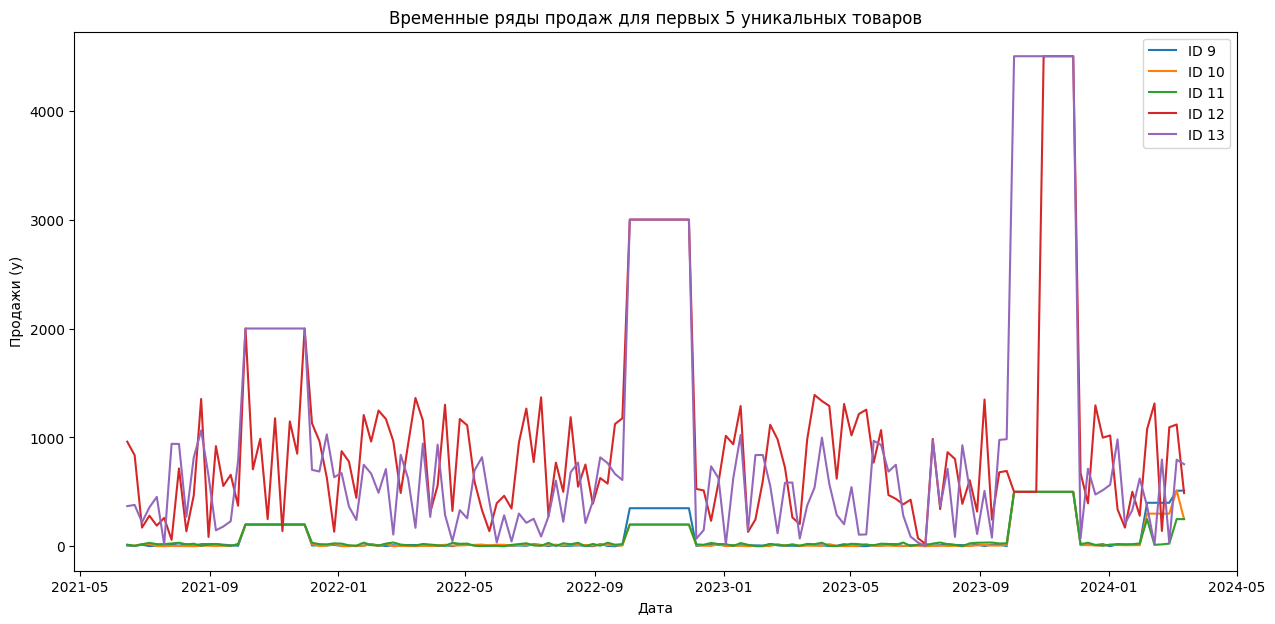

unique_id,9,10,11,12,13,14,15,16,17,18,...,384,385,386,387,388,389,390,391,392,423
date,,,,,,,,,,,,,,,,,,,,,
2021-06-15,7,13,15,961,369,17,28,249,1565,24,...,50,50,50,50,50,50,50,10,25,10
2021-06-22,4,6,4,837,380,24,33,584,1914,17,...,50,50,50,50,50,50,50,10,25,10
2021-06-29,15,20,19,172,221,24,33,538,1465,14,...,50,50,50,50,50,50,50,10,25,10
2021-07-06,2,20,32,281,358,12,14,1271,589,1,...,50,50,50,50,50,50,50,10,25,10
2021-07-13,6,2,20,190,454,34,33,1391,400,20,...,50,50,50,50,50,50,50,10,25,10


In [10]:
# Группировка данных по 'unique_id' и 'date', агрегация значений 'y'
time_series_data = data.groupby(['unique_id', 'date'])['y'].sum().unstack(level=0)

# Визуализация временных рядов для первых нескольких товаров
plt.figure(figsize=(15, 7))
for column in time_series_data.columns[:5]:  # Отображение временных рядов для первых 5 товаров
    plt.plot(time_series_data.index, time_series_data[column], label=f'ID {column}')

plt.title('Временные ряды продаж для первых 5 уникальных товаров')
plt.xlabel('Дата')
plt.ylabel('Продажи (y)')
plt.legend()
plt.show()

time_series_data.head()

 ## ТОП5 ПО КОЛИЧЕСТВУ ПРОДАЖ

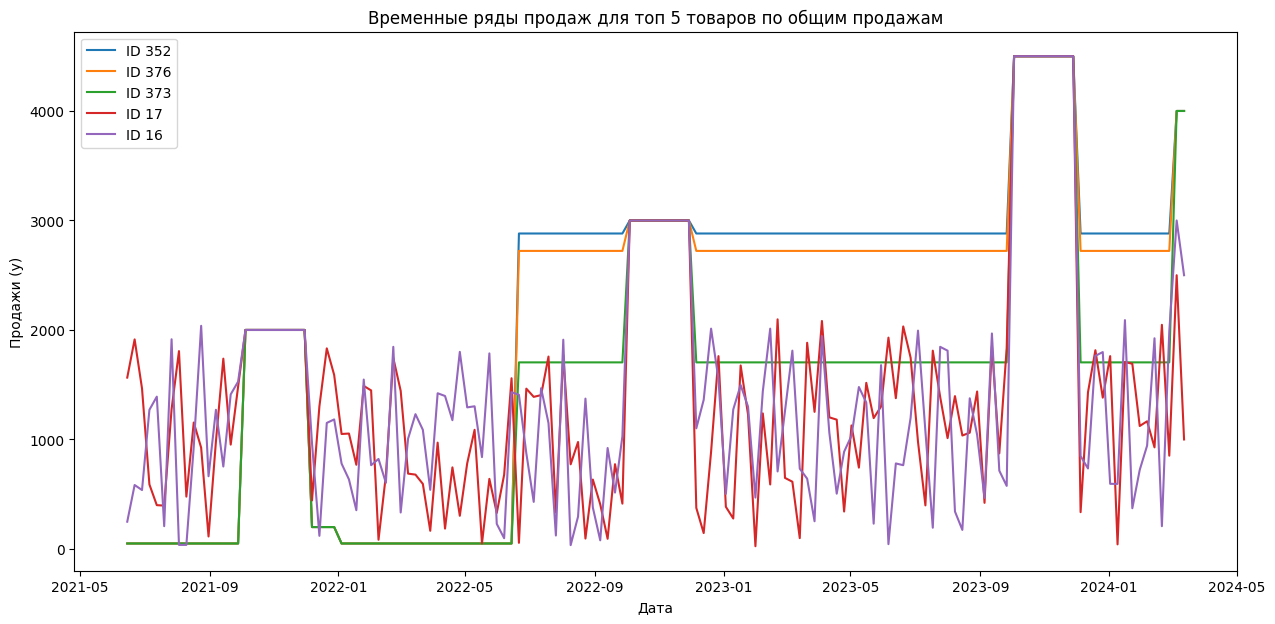

unique_id,352,376,373,17,16
date,,,,,
2021-06-15,50,50,50,1565,249
2021-06-22,50,50,50,1914,584
2021-06-29,50,50,50,1465,538
2021-07-06,50,50,50,589,1271
2021-07-13,50,50,50,400,1391


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Группировка данных по 'unique_id' и 'date', агрегация значений 'y'
time_series_data = data.groupby(['unique_id', 'date'])['y'].sum().unstack(level=0)

# Сортировка столбцов по суммарным продажам и выбор топ-5
top_products = time_series_data.sum().sort_values(ascending=False).head(5).index

# Визуализация временных рядов для топ-5 товаров по продажам
plt.figure(figsize=(15, 7))
for column in top_products:
    plt.plot(time_series_data.index, time_series_data[column], label=f'ID {column}')

plt.title('Временные ряды продаж для топ 5 товаров по общим продажам')
plt.xlabel('Дата')
plt.ylabel('Продажи (y)')
plt.legend()
plt.show()

# Вывод первых строк данных для проверки
time_series_data[top_products].head()


## ТОП 5 ПО СУММЕ ПРОДАЖ

In [13]:
# Загрузка данных
data = pd.read_excel("/Users/mymac/Desktop/DIPLOM/SALES_1/sales1.xlsx")

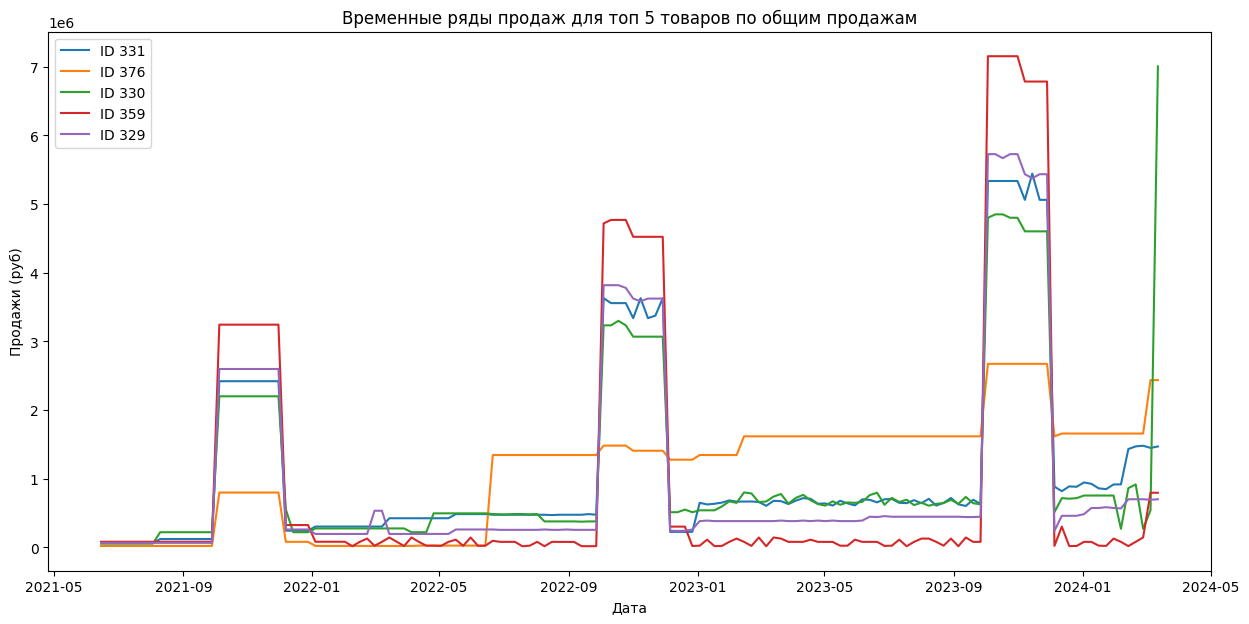

unique_id,331,376,330,359,329
date,,,,,
2021-06-15,60500,19950,55000,81100,64950
2021-06-22,60500,19950,55000,81100,64950
2021-06-29,60500,19950,55000,81100,64950
2021-07-06,60500,19950,55000,81100,64950
2021-07-13,60500,19950,55000,81100,64950


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что 'data' уже загружен и содержит столбцы 'unique_id', 'date', 'y', и 'price'

# Расчёт суммы продаж как произведение количества продаж на цену
data['sales_amount'] = data['y'] * data['price']

# Группировка данных по 'unique_id' и 'date', агрегация суммы продаж
time_series_data = data.groupby(['unique_id', 'date'])['sales_amount'].sum().unstack(level=0)

# Сортировка столбцов по суммарным продажам и выбор топ-5
top_products = time_series_data.sum().sort_values(ascending=False).head(5).index

# Визуализация временных рядов для топ-5 товаров по продажам
plt.figure(figsize=(15, 7))
for column in top_products:
    plt.plot(time_series_data.index, time_series_data[column], label=f'ID {column}')

plt.title('Временные ряды продаж для топ 5 товаров по общим продажам')
plt.xlabel('Дата')
plt.ylabel('Продажи (руб)')
plt.legend()
plt.show()

# Вывод первых строк данных для проверки
time_series_data[top_products].head()

На графике представлены временные ряды продаж для первых пяти уникальных товаров. Как видно, продажи различаются по динамике и объему, что делает каждый временной ряд уникальным.

## Стационарность

In [10]:
from statsmodels.tsa.stattools import adfuller

# Функция для проведения теста Дики-Фуллера и вывода результатов
def adf_test(time_series):
    result = adfuller(time_series.dropna())  # Удаление NA значений для чистоты теста
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    return adf_statistic, p_value, critical_values

# Проведение теста для первых пяти уникальных ID товаров
adf_results = {}
for column in time_series_data.columns[:5]:
    adf_statistic, p_value, critical_values = adf_test(time_series_data[column])
    adf_results[column] = {
        'ADF Statistic': adf_statistic,
        'p-value': p_value,
        'Critical Values': critical_values
    }

adf_results


{9: {'ADF Statistic': -1.7186819157038953,
  'p-value': 0.42151360454025144,
  'Critical Values': {'1%': -3.480118600110386,
   '5%': -2.8833618426136196,
   '10%': -2.578407034974382}},
 10: {'ADF Statistic': -2.1961618145629576,
  'p-value': 0.2076414449275028,
  'Critical Values': {'1%': -3.482087964046026,
   '5%': -2.8842185101614626,
   '10%': -2.578864381347275}},
 11: {'ADF Statistic': -2.7502200975217073,
  'p-value': 0.0657437981132718,
  'Critical Values': {'1%': -3.480500383888377,
   '5%': -2.8835279559405045,
   '10%': -2.578495716547007}},
 12: {'ADF Statistic': -5.040225547699442,
  'p-value': 1.846501000051492e-05,
  'Critical Values': {'1%': -3.4769274060112707,
   '5%': -2.8819726324025625,
   '10%': -2.577665408088415}},
 13: {'ADF Statistic': -3.014601475896286,
  'p-value': 0.033553123628232165,
  'Critical Values': {'1%': -3.480118600110386,
   '5%': -2.8833618426136196,
   '10%': -2.578407034974382}}}

In [13]:
# Проведение теста Дики-Фуллера для всех уникальных ID товаров
all_adf_results = {}
for column in time_series_data.columns:
    adf_statistic, p_value, critical_values = adf_test(time_series_data[column])
    all_adf_results[column] = {
        'ADF Statistic': adf_statistic,
        'p-value': p_value,
        'Critical Values (1%)': critical_values['1%'],
        'Critical Values (5%)': critical_values['5%'],
        'Critical Values (10%)': critical_values['10%']
    }

# Конвертирование результатов в DataFrame для лучшего представления
adf_results_df = pd.DataFrame(all_adf_results).T
adf_results_df.head(10)  # Показать результаты для первых 10 ID товаров
#adf_results_df.to_excel('/Users/mymac/Desktop/disserta/adf_results.xlsx', index=True)

,ADF Statistic,p-value,Critical Values (1%),Critical Values (5%),Critical Values (10%)
9,-1.718682,0.421514,-3.480119,-2.883362,-2.578407
10,-2.196162,0.207641,-3.482088,-2.884219,-2.578864
11,-2.750220,0.065744,-3.480500,-2.883528,-2.578496
12,-5.040226,0.000018,-3.476927,-2.881973,-2.577665
13,-3.014601,0.033553,-3.480119,-2.883362,-2.578407
14,-2.773758,0.062121,-3.480119,-2.883362,-2.578407
15,-2.779799,0.061218,-3.480119,-2.883362,-2.578407
16,-3.665356,0.004628,-3.480119,-2.883362,-2.578407
17,-3.841849,0.002507,-3.478648,-2.882722,-2.578065
18,-2.758029,0.064524,-3.480119,-2.883362,-2.578407


## Декомпозиция

Summary of Components by ID:
IDs with a Trend: 212
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,

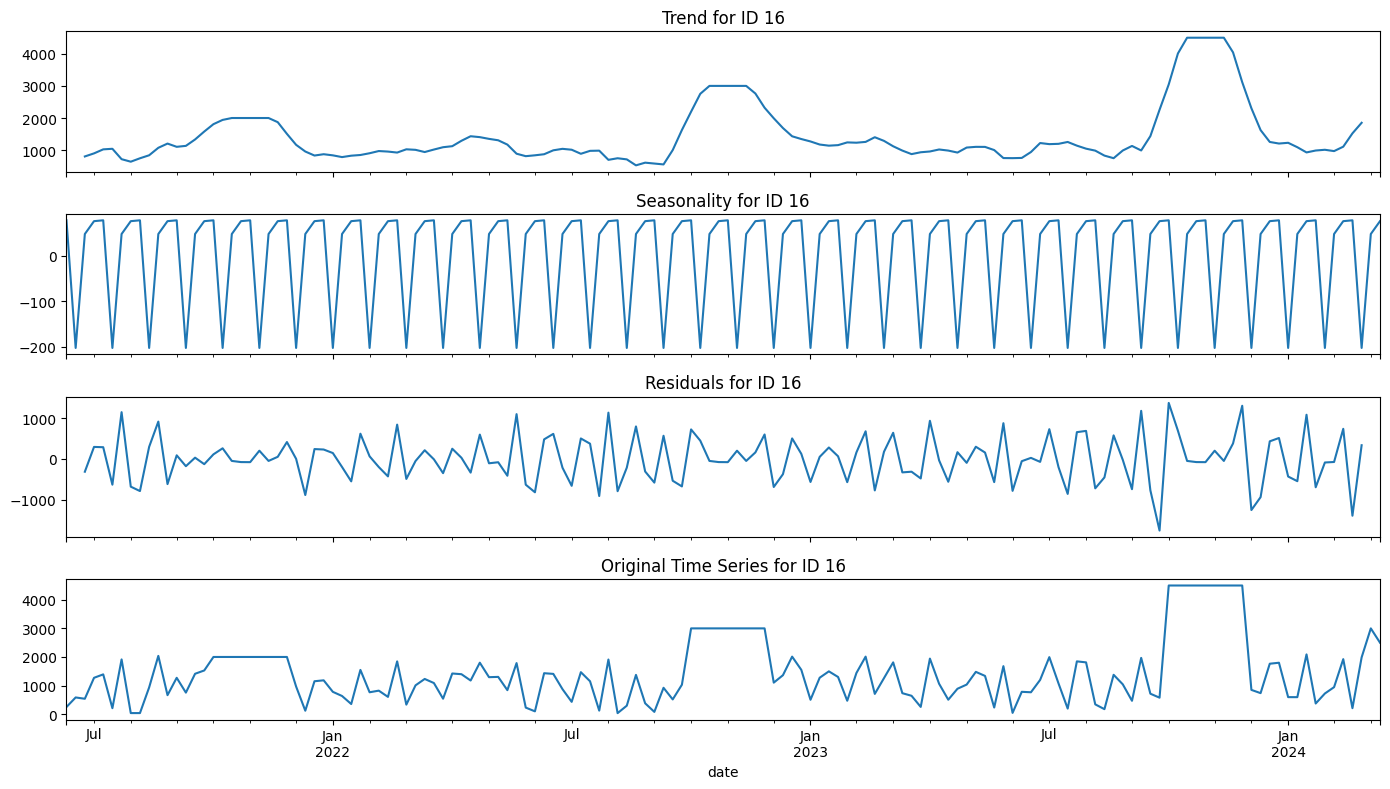

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_excel("/Users/mymac/Desktop/disserta/sales.xlsx")

# Функция для декомпозиции временных рядов на тренд, сезонность и остатки
def decompose_time_series(series, model='additive'):
    # Необходимо обеспечить, что в данных нет пропущенных значений
    series = series.dropna()
    # Применение декомпозиции
    decomposition = seasonal_decompose(series, model=model, period=4)  # Предполагаемый квартальный период сезонности
    return decomposition

# Анализ и запись результатов декомпозиции
decomposition_results = {}
summary = {'trend': [], 'seasonal': [], 'residual': []}

for column in time_series_data.columns:
    decomposition = decompose_time_series(time_series_data[column])
    decomposition_results[column] = decomposition
    
    # Анализ наличия компонентов и запись идентификаторов товаров с заметным трендом и сезонностью
    if decomposition.trend.dropna().std() > 0.01:
        summary['trend'].append(column)
    if decomposition.seasonal.dropna().std() > 0.01:
        summary['seasonal'].append(column)
    if decomposition.resid.dropna().std() > 0.01:
        summary['residual'].append(column)

# Вывод сводной таблицы с идентификаторами товаров, у которых есть тренды и сезонность
print("Summary of Components by ID:")
if summary['trend']:
    print("IDs with a Trend:", len(summary['trend']))
    print(summary['trend'])
if summary['seasonal']:
    print("IDs with Seasonality:", len(summary['seasonal']))
    print(summary['seasonal'])
if summary['residual']:
    print("IDs with Significant Residuals:", len(summary['residual']))
    print(summary['residual'])

# Визуализация результатов декомпозиции для первого товара с трендом, если таковой имеется
if summary['trend']:
    first_trend_id = summary['trend'][7]
    fig, axes = plt.subplots(4, 1, figsize=(14, 8), sharex=True)
    decomposition_results[first_trend_id].trend.plot(ax=axes[0], title=f'Trend for ID {first_trend_id}')
    decomposition_results[first_trend_id].seasonal.plot(ax=axes[1], title=f'Seasonality for ID {first_trend_id}')
    decomposition_results[first_trend_id].resid.plot(ax=axes[2], title=f'Residuals for ID {first_trend_id}')
    time_series_data[first_trend_id].plot(ax=axes[3], title=f'Original Time Series for ID {first_trend_id}')
    plt.tight_layout()
    plt.show()
else:
    print("No IDs with significant trends found.")


## Анализ компонентов декомпозиции для ряда из топ 5 продаж с id 16:

### Тренд (Trend):
* Показывает общее направление данных продаж со временем. Для ID 16 виден некоторый восходящий тренд, что указывает на увеличение продаж.
### Сезонность (Seasonality):
* Отражает регулярные и повторяющиеся паттерны в данных, связанные с сезонными изменениями. Для ID 16 наблюдается чёткая сезонность с периодическими пиками и спадами.
### Остатки (Residuals):
* Составляют часть данных, которая не объясняется трендом и сезонностью. Они должны быть "белым шумом", то есть случайными колебаниями вокруг среднего значения, близкого к нулю. На графике видны остатки с некоторыми колебаниями, что может указывать на другие, неучтенные факторы или несовершенство модели декомпозиции.
### Выводы:
* Временные ряды некоторых товаров демонстрируют четкую сезонность, что может быть использовано для планирования продаж и маркетинговых кампаний.
Наличие тренда в данных подчеркивает важность адаптации бизнес-стратегий к изменяющимся условиям рынка.

In [28]:
# Применяем декомпозицию ко всем временным рядам уникальных ID
full_decomposition_results = {}
for column in time_series_data.columns:
    try:
        decomposition = decompose_time_series(time_series_data[column])
        full_decomposition_results[column] = {
            'Trend': decomposition.trend.dropna().values,
            'Seasonality': decomposition.seasonal.dropna().values,
            'Residuals': decomposition.resid.dropna().values
        }
    except ValueError:  # В случае если в данных меньше, чем необходимо для декомпозиции
        full_decomposition_results[column] = {
            'Trend': None,
            'Seasonality': None,
            'Residuals': None
        }

# Создание DataFrame для удобного представления средних значений каждого компонента
decomposition_averages = {
    'Average Trend': [],
    'Average Seasonality': [],
    'Average Residuals': []
}

for key, components in full_decomposition_results.items():
    if components['Trend'] is not None:
        decomposition_averages['Average Trend'].append(np.nanmean(components['Trend']))
        decomposition_averages['Average Seasonality'].append(np.nanmean(components['Seasonality']))
        decomposition_averages['Average Residuals'].append(np.nanmean(components['Residuals']))
    else:
        decomposition_averages['Average Trend'].append(None)
        decomposition_averages['Average Seasonality'].append(None)
        decomposition_averages['Average Residuals'].append(None)

decomposition_df = pd.DataFrame(decomposition_averages, index=full_decomposition_results.keys())
decomposition_df.head(10)  # Отображение результатов для первых 10 ID товаров
decomposition_df.to_excel('/Users/mymac/Desktop/disserta/decomposition_df.xlsx', index=True) 



## Выводы:
* Тренд: Показывает общее направление изменения продаж для каждого товара. Некоторые товары имеют высокий средний тренд, что указывает на рост продаж в течение времени.
* Сезонность: Близка к нулю для большинства товаров, что может означать отсутствие значительного сезонного влияния на продажи, или же сезонные колебания уравновешивают друг друга в течение года.
* Остатки: Остатки в основном колеблются около нуля, но имеют отклонения, указывающие на возможные нерегулярные влияния или шумы в данных.

## Анализ распределния остатков 

общий анализ

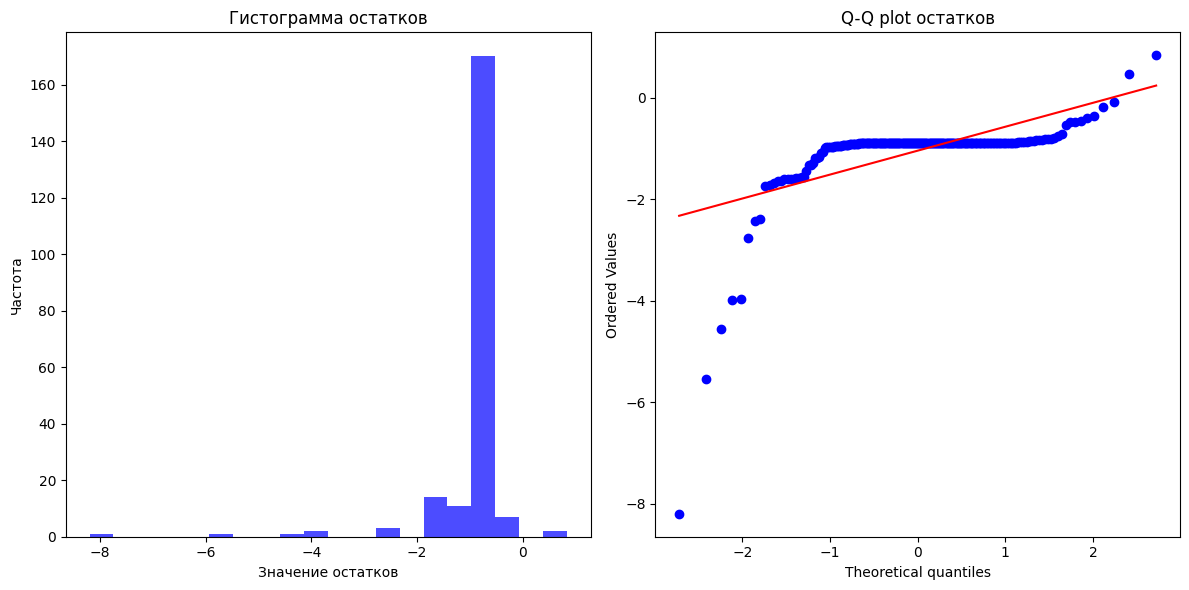

Значение статистики Шапиро-Уилка: 0.378628328617299, p-value: 2.0684621558827465e-26
Остатки не следуют нормальному распределению (по критерию Шапиро-Уилка).


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Загрузка данных
df = pd.read_excel('/Users/mymac/Desktop/disserta/decomposition_df.xlsx')

# Визуализация распределения остатков с помощью гистограммы
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Первый подграфик для гистограммы
plt.hist(df['Average Residuals'], bins=20, color='blue', alpha=0.7)
plt.title('Гистограмма остатков')
plt.xlabel('Значение остатков')
plt.ylabel('Частота')

# Q-Q plot для проверки на нормальность
plt.subplot(1, 2, 2)  # Второй подграфик для Q-Q plot
stats.probplot(df['Average Residuals'], dist="norm", plot=plt)
plt.title('Q-Q plot остатков')

plt.tight_layout()
plt.show()

# Тест Шапиро-Уилка на нормальность
shapiro_test = stats.shapiro(df['Average Residuals'])
print(f"Значение статистики Шапиро-Уилка: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

# Вывод результата теста
if shapiro_test[1] > 0.05:
    print("Остатки можно считать нормально распределенными (по критерию Шапиро-Уилка).")
else:
    print("Остатки не следуют нормальному распределению (по критерию Шапиро-Уилка).")


цикл для всех

In [39]:
# Группировка данных по 'unique_id' и 'date', агрегация значений 'y'
time_series_data = data.groupby(['unique_id', 'date'])['y'].sum().unstack(level=0)
full_decomposition_results = {}
for column in time_series_data.columns:
    try:
        decomposition = decompose_time_series(time_series_data[column])
        full_decomposition_results[column] = {
            'Trend': decomposition.trend.dropna().values,
            'Seasonality': decomposition.seasonal.dropna().values,
            'Residuals': decomposition.resid.dropna().values
        }
    except ValueError:  # В случае если в данных меньше, чем необходимо для декомпозиции
        full_decomposition_results[column] = {
            'Trend': None,
            'Seasonality': None,
            'Residuals': None
    }
decomposition_df = pd.DataFrame(full_decomposition_results, index=time_series_data.columns)
decomposition_df.head(10)
decomposition_df.to_excel('/Users/mymac/Desktop/disserta/decomposition_for_each_df.xlsx', index=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Загрузка данных
df = pd.read_excel('/Users/mymac/Desktop/disserta/sales.xlsx')

# Группировка по уникальным id и анализ распределения остатков для каждой группы
for id, group_df in df.groupby('unique_id'):
    # Визуализация распределения остатков с помощью гистограммы
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)  # Первый подграфик для гистограммы
    plt.hist(group_df['Average Residuals'], bins=20, color='blue', alpha=0.7)
    plt.title(f'Гистограмма остатков для id: {id}')
    plt.xlabel('Значение остатков')
    plt.ylabel('Частота')

    # Q-Q plot для проверки на нормальность
    plt.subplot(1, 2, 2)  # Второй подграфик для Q-Q plot
    stats.probplot(group_df['Average Residuals'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot остатков для id: {id}')

    plt.tight_layout()
    plt.show()

    # Тест Шапиро-Уилка на нормальность
    shapiro_test = stats.shapiro(group_df['Average Residuals'])
    print(f"Значение статистики Шапиро-Уилка для id {id}: {shapiro_test[0]}, p-value: {shapiro_test[1]}")

    # Вывод результата теста
    if shapiro_test[1] > 0.05:
        print(f"Остатки можно считать нормально распределенными (по критерию Шапиро-Уилка) для id {id}.")
    else:
        print(f"Остатки не следуют нормальному распределению (по критерию Шапиро-Уилка) для id {id}.")

## Распределение цен для топ-5 

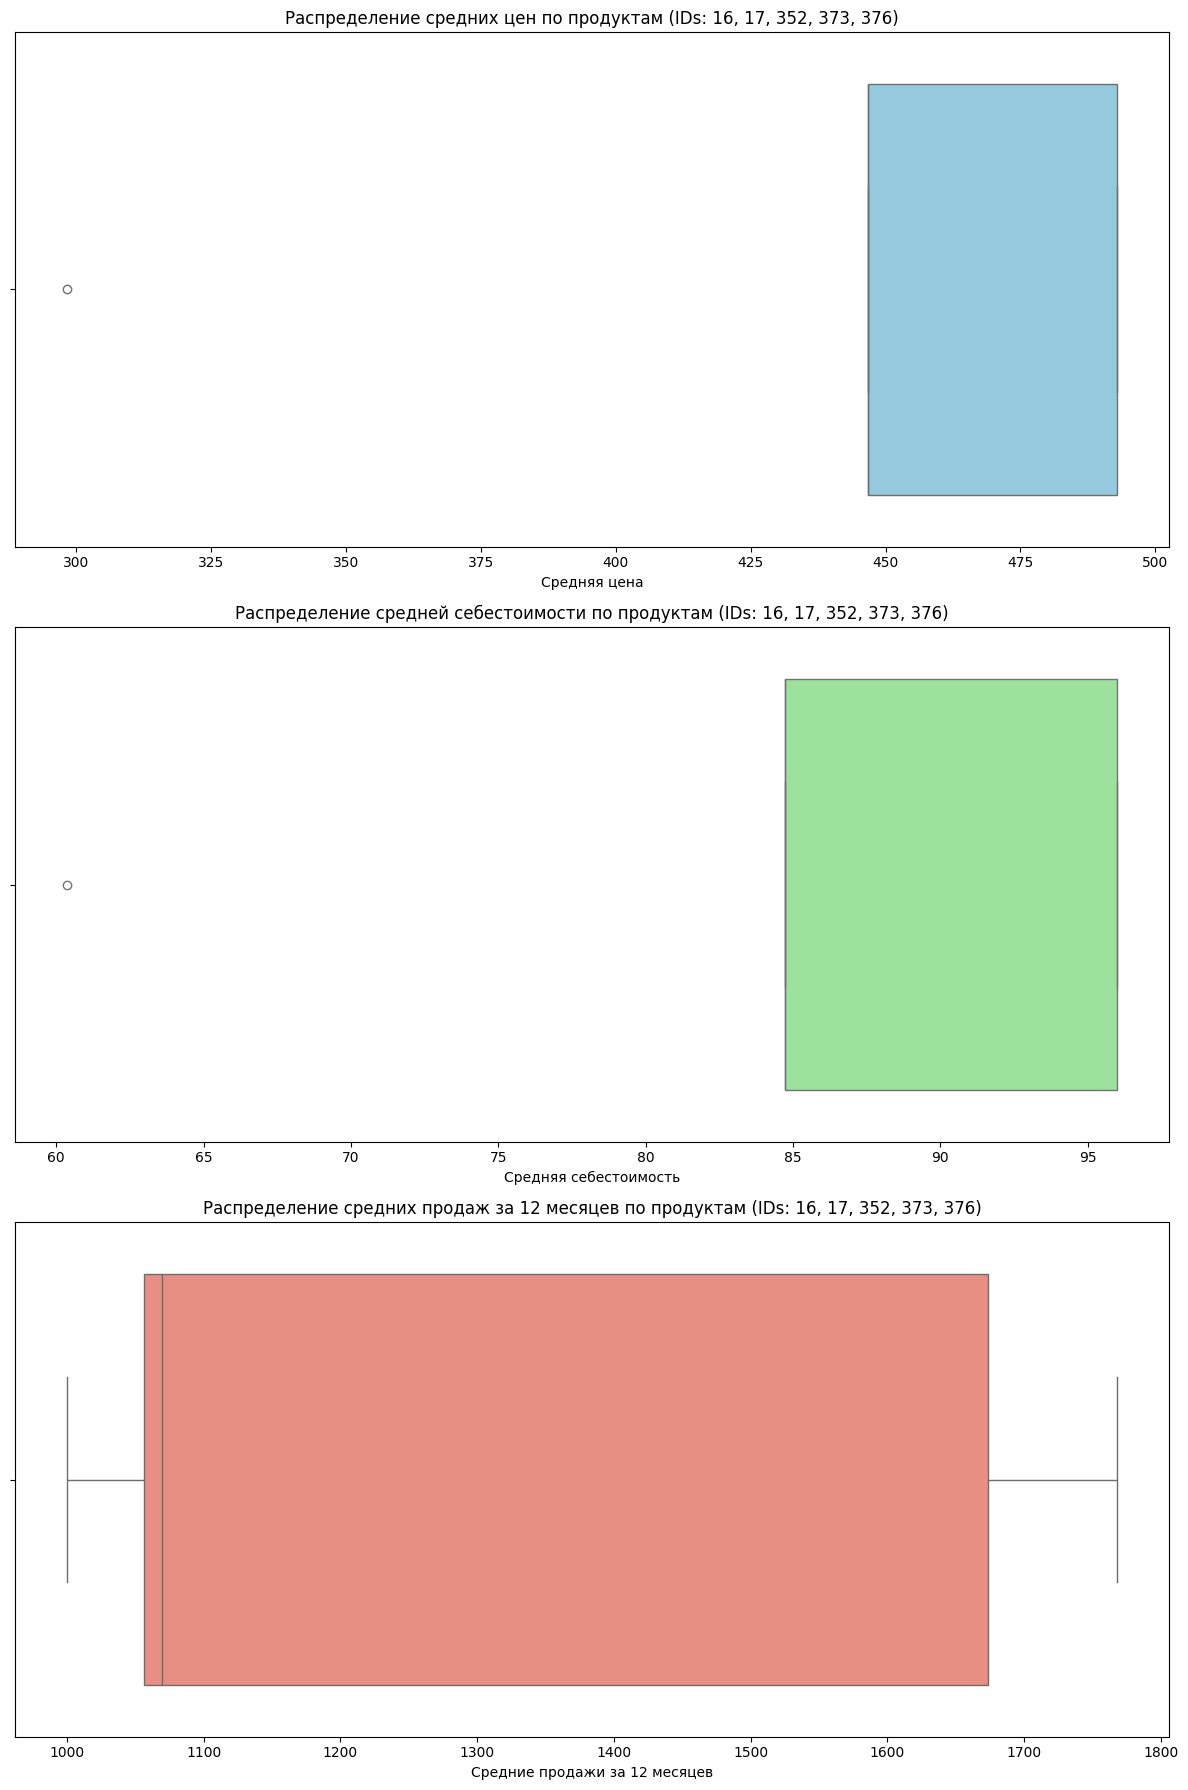

In [13]:
# Filter the data for the specific IDs
import matplotlib.pyplot as plt
import seaborn as sns
filtered_data = data[['date', 'y', 'unique_id']]
ids_of_interest = [16, 17, 352, 373, 376]
filtered_data = grouped_data[grouped_data['unique_id'].isin(ids_of_interest)]

# Create the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Boxplot for mean prices
sns.boxplot(x='price_mean', data=filtered_data, ax=axes[0], color='skyblue')
axes[0].set_title('Распределение средних цен по продуктам (IDs: {})'.format(', '.join(map(str, ids_of_interest))))
axes[0].set_xlabel('Средняя цена')

# Boxplot for mean cost prices
sns.boxplot(x='cost price_mean', data=filtered_data, ax=axes[1], color='lightgreen')
axes[1].set_title('Распределение средней себестоимости по продуктам (IDs: {})'.format(', '.join(map(str, ids_of_interest))))
axes[1].set_xlabel('Средняя себестоимость')

# Boxplot for mean sales over 12 months
sns.boxplot(x='sales_12m_avg_mean', data=filtered_data, ax=axes[2], color='salmon')
axes[2].set_title('Распределение средних продаж за 12 месяцев по продуктам (IDs: {})'.format(', '.join(map(str, ids_of_interest))))
axes[2].set_xlabel('Средние продажи за 12 месяцев')

plt.tight_layout()
plt.show()

Продажи для айди топ 5


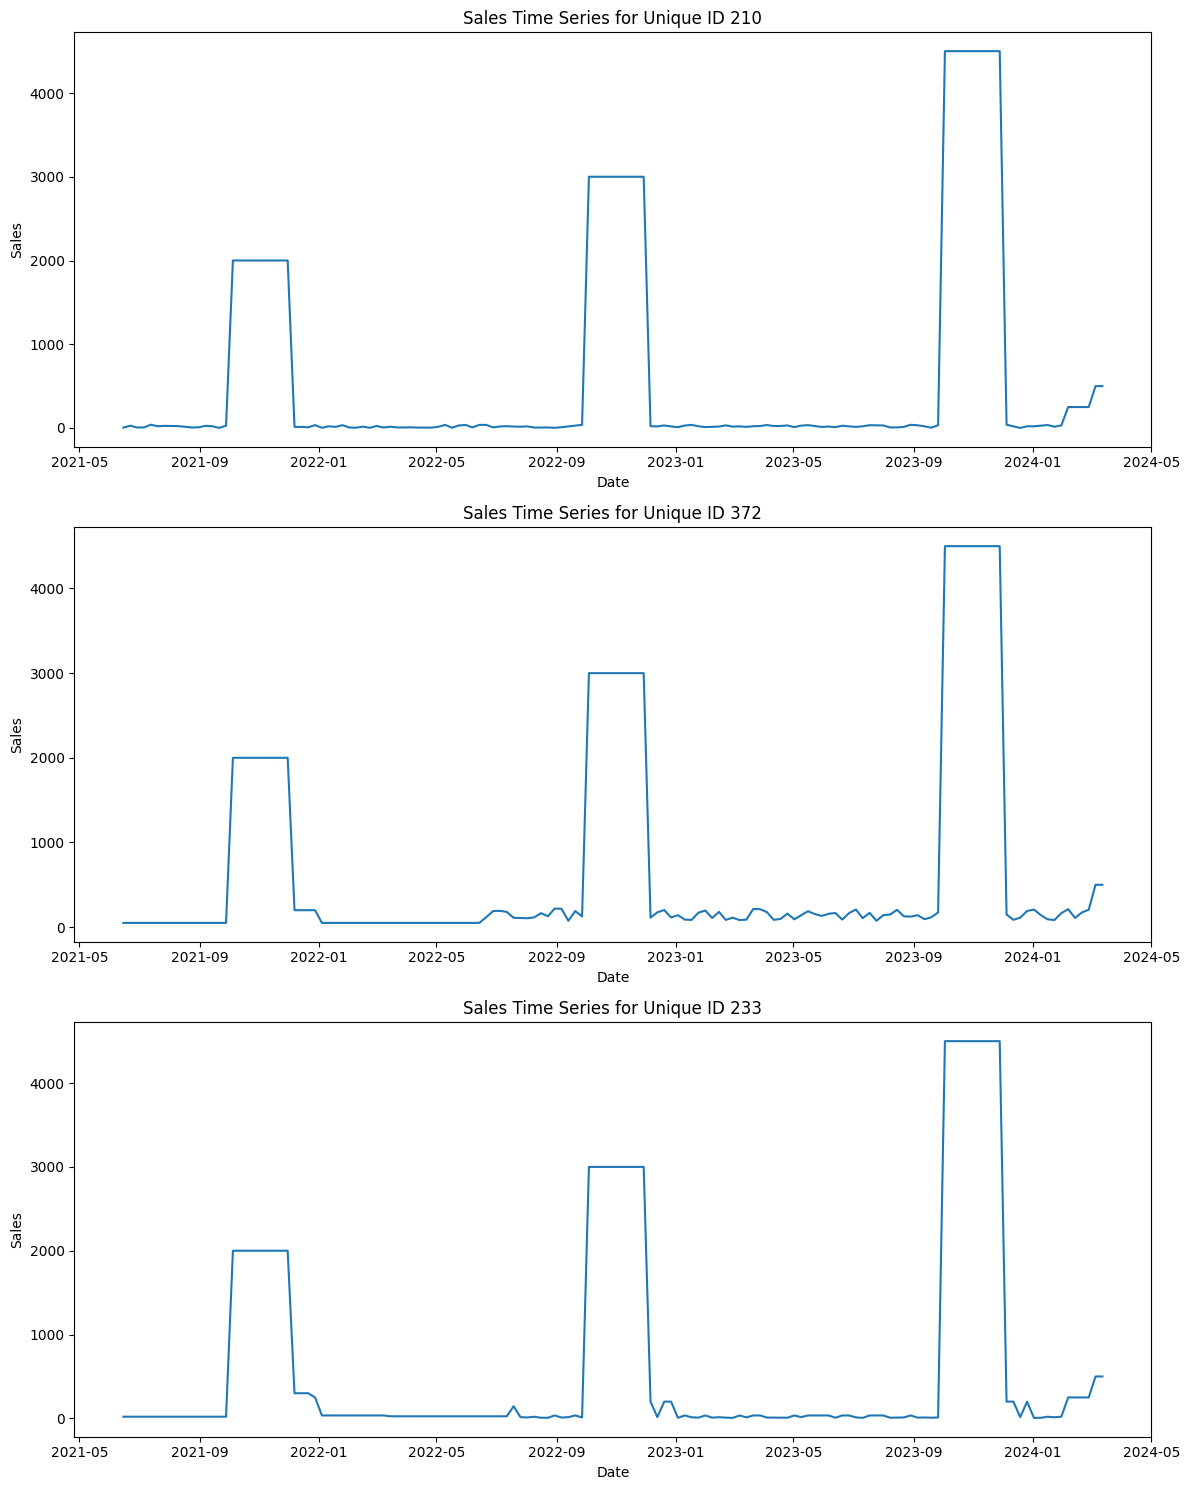

count    212.0
mean     144.0
std        0.0
min      144.0
25%      144.0
50%      144.0
75%      144.0
max      144.0
dtype: float64

In [6]:
import matplotlib.pyplot as plt

# Check the number of data points per unique product
data_points_per_product = filtered_data.groupby('unique_id').size()

# Display statistics of data points per product
data_point_stats = data_points_per_product.describe()

# Plotting sales distribution for a few unique IDs to inspect the time series visually
sample_ids = data_points_per_product[data_points_per_product > 50].sample(3, random_state=1).index.tolist()
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

for i, uid in enumerate(sample_ids):
    subset = filtered_data[filtered_data['unique_id'] == uid]
    axs[i].plot(subset['date'], subset['y'])
    axs[i].set_title(f"Sales Time Series for Unique ID {uid}")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Sales")

plt.tight_layout()
plt.show()

data_point_stats


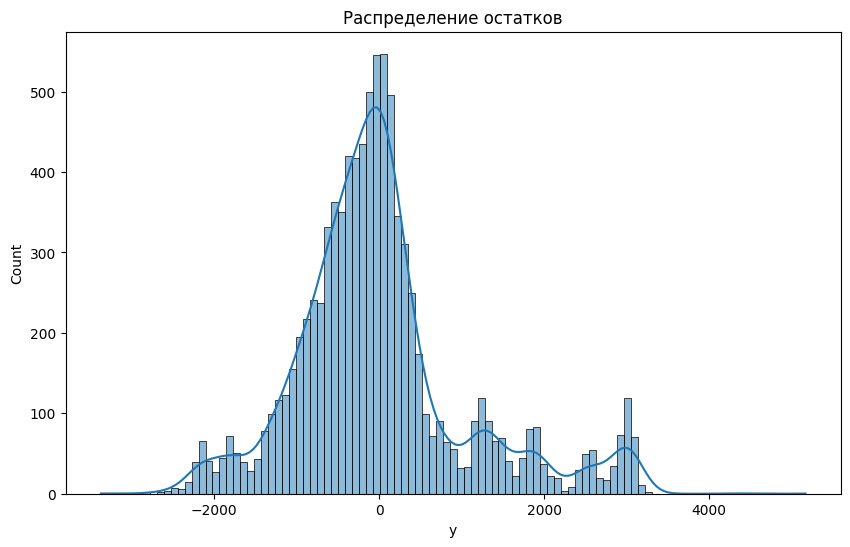

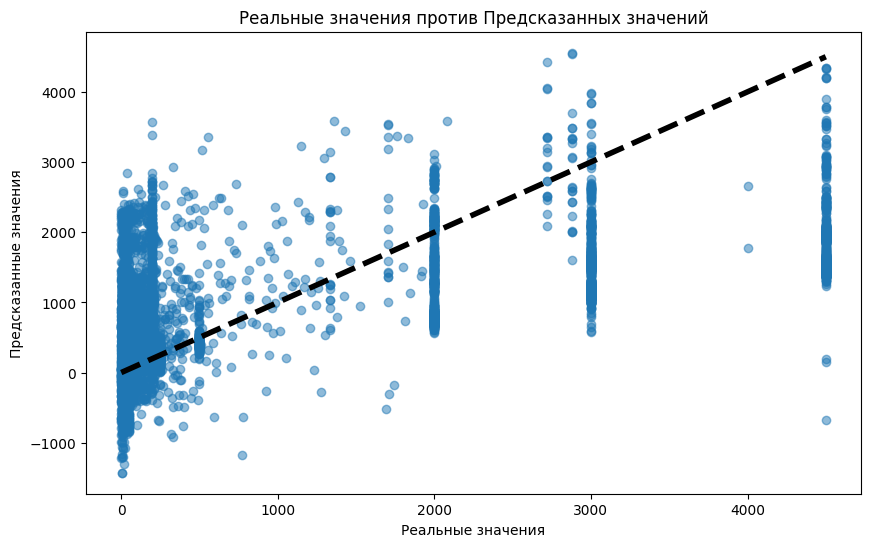

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Расчет остатков
residuals = y_test - y_pred

# Визуализация остатков
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Распределение остатков')
plt.show()

# Визуализация реальных значений против предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Реальные значения против Предсказанных значений')
plt.show()



Ненормальное распределение Остатки имеют форму, которая не соответствует нормальному распределению. Основная часть данных сосредоточена около нуля, но есть значимые хвосты, особенно положительные.

Наличие выбросов На графике видны отдельные пики, которые далеко отстоят от основной массы данных. Эти пики указывают на наличие выбросов в данных, которые модель не смогла адекватно обработать.

Смещение Остатки не симметричны вокруг нуля, что указывает на возможное смещение в предсказаниях модели.